# Исследование видеоиг

## Описание проекта

Магазин «Стримчик» продаёт по всему миру видеоигры. По открытым историческим данным (до 2016 г.) о продажах игр, оценках пользователей и экспертов, жанрах и платформах необходимо выявить потенциально популярные игры, чтобы спланировать рекламные кампании.

## Предобработка данных

Импорт библиотек 

In [1]:
import pandas as pd
# pip install pandas-profiling
# import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Открытие файла

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
display(df.sample(20))

Name Platform  \
4523                                       TouchMaster 3       DS   
8233                The Grim Adventures of Billy & Mandy       GC   
1500                                 Rugrats Studio Tour       PS   
2481                                  Duke Nukem Forever     X360   
10328                                    Tournament Pool      Wii   
2554                       Who wants to be a millionaire       PS   
13912                                  Just Sing! Vol. 2       DS   
9522                            Peppa Pig: Fun and Games      Wii   
8071                                   Alone in the Dark      Wii   
1528                                        Transformers      PS2   
7136                             Gundam Battle Chronicle      PSP   
14490                                          The Voice      PS3   
14719                                  Pacific Liberator      Wii   
4051                                Pokemon Art Academy       3DS   
337                      Assassin's Creed IV: Black Flag      PS3   
4530                                      Alpha Protocol      PS3   
16361                  PDC World Championship Darts 2009      Wii   
4363                                      We Sing Encore      Wii   
14068                               Hakuouki: Zuisouroku      PS2   
10618  Codename: Kids Next Door: Operation V.I.D.E.O....      PS2   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
4523            2009.0        Puzzle      0.29      0.11      0.00   
8233            2006.0        Action      0.13      0.03      0.00   
1500            1999.0     Adventure      0.57      0.67      0.00   
2481            2011.0       Shooter      0.52      0.25      0.00   
10328           2009.0        Sports      0.10      0.00      0.00   
2554            2000.0          Misc      0.45      0.30      0.00   
13912           2011.0          Misc      0.00      0.03      0.00   
9522            2010.0          Misc      0.00      0.11      0.00   
8071            2008.0     Adventure      0.09      0.08      0.00   
1528            2004.0       Shooter      0.63      0.49      0.00   
7136            2007.0        Action      0.00      0.00      0.22   
14490           2014.0        Action      0.02      0.00      0.00   
14719           2009.0        Action      0.03      0.00      0.00   
4051            2014.0          Misc      0.18      0.12      0.16   
337             2013.0        Action      1.33      1.68      0.13   
4530            2010.0  Role-Playing      0.19      0.17      0.00   
16361           2009.0        Sports      0.00      0.01      0.00   
4363            2010.0          Misc      0.00      0.39      0.00   
14068           2009.0     Adventure      0.00      0.00      0.04   
10618           2005.0      Platform      0.05      0.04      0.00   

       Other_sales  Critic_Score User_Score Rating  
4523          0.04          68.0        tbd      E  
8233          0.00           NaN        NaN    NaN  
1500          0.07           NaN        NaN    NaN  
2481          0.07          49.0        4.4      M  
10328         0.01           NaN        tbd      E  
2554          0.05           NaN        NaN    NaN  
13912         0.00           NaN        NaN    NaN  
9522          0.02           NaN        NaN    NaN  
8071          0.02          39.0        4.4      M  
1528          0.16          75.0        8.6      T  
7136          0.00           NaN        NaN    NaN  
14490         0.01           NaN        tbd    NaN  
14719         0.00           NaN        tbd      T  
4051          0.03          76.0        7.7      E  
337           0.57          88.0        8.1      M  
4530          0.07          64.0        6.9      M  
16361         0.00           NaN        NaN    NaN  
4363          0.06           NaN        NaN    NaN  
14068         0.00           NaN        NaN    NaN  
10618         0.01          49.0          8   E10+

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

### Названия столбцов, типы данных

Названия столбцов к "змеиному регистру"

In [6]:
df.columns = df.columns.str.lower() # автоматическое приведение заголовков таблицы к нижнему регистру

In [7]:
display(df.sample(5))

name platform  year_of_release      genre  \
3321   Cabela's Monster Buck Hunter      Wii           2010.0     Sports   
8886       The King of Fighters XIV      PS4           2016.0   Fighting   
4834               Avatar: The Game       DS           2009.0     Action   
14773                 Loading Human      PS4           2016.0  Adventure   
338                FIFA Soccer 2005      PS2           2004.0     Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
3321       0.57      0.00      0.00         0.03           NaN        tbd   
8886       0.07      0.02      0.04         0.02          79.0        8.7   
4834       0.18      0.18      0.00         0.04           NaN        NaN   
14773      0.01      0.01      0.00         0.00           NaN        NaN   
338        0.58      2.48      0.04         0.59          81.0        7.6   

      rating  
3321       T  
8886       T  
4834     NaN  
14773    NaN  
338        E

In [8]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

Верный тип данных:
<br>
`year_of_release` - год выхода игры это целое число (int64);
<br>
`critic_score` - оценка критиков по стобальной системе это целое число (int64), видно, что долей балов критики не дают, только целое количество баллов;
<br>
`user_score` - оценка игроков это число с плавающей точкой (float64); 

In [9]:
# удалим игры, для которых год выхода пропущен, и изменим тип данных `Year_of_Release`

df = df.dropna(subset=['year_of_release', 'name', 'genre'])
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце `user_score` встречаются значений tbd. tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Т.е. фактически это те же NaN. В них и надо превратить tbd и посмотреть сколько тогда будет NaN. 

In [10]:
# заменим тип данных `user_score`, превращая tbd в NaN 
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Чтобы изменить тип переменной `critic_score` на целочисленный, необходимо сначала заполнить пропуски, если возможно

- [x]  названия столбцов приведены к "змеиному регистру"
- [x]  данные приведены к нужному типу  
- [x]  замена типа данных в столбцах описана и пояснена

### Обработка пропусков

В `year_of_release` пропуски были удалены, т.к. заполнить их не представляется возможным.
<br>
В `user_score` значения tbd были преобразованы в NaN.
<br>
<br>
`user_score` и `critic_score` зависят от многих факторов игр (например, сюжета, анимации, персонажей, режимов использования, игрового управления, сложности, команды разработчиков, прошлых частей игры, индивидуального вкуса и предпочтений и т.д.), поэтому заполнять пропуски в них медианой для игр того же жанра и той же платформы представляется неверным. Нормальное распределение оценок (смещенное у пользователей в сторону более высоких; мода - 8) такое заполнение не изменит, но определенности данным данным и достоверности выводам по ним не добавит. 
<br>
<br>
Возможно до начала 2000-х никаких оценок игр критиками и игроками не было (или их было очень мало). Необходимо проверить, как распределены NaN. 

In [12]:
# сколько уникальных рейтингов в df (неявные дубликаты - EC, K-A, AO)
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [13]:
# перекодируем все рейтинги в современные (уберем неявные дубликаты)

def fix_rating(rating):
    try:
        if  rating == 'E':
            return 'E'
        elif rating == 'T':
            return 'T'
        elif rating == 'M':
            return 'M'
        elif rating == 'E10+':
            return 'E10+'
        elif rating == 'K-A' or rating == 'EC':
            return 'E'
        elif rating == 'AO':
            return 'M'
        elif rating == 'RP':
            return 'unknown'
    except:
        pass

df['rating'] = df['rating'].apply(fix_rating)

In [14]:
df['rating'].value_counts()

E          3932
T          2905
M          1537
E10+       1393
unknown       1
Name: rating, dtype: int64

In [15]:
# заменим NA на unknown 
df['rating'] = df['rating'].fillna('unknown')
df['rating'].value_counts()

unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

In [16]:
display(df.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  
0     28.96      3.77         8.45          76.0         8.0        E  
1      3.58      6.81         0.77           NaN         NaN  unknown  
2     12.76      3.79         3.29          82.0         8.3        E  
3     10.93      3.28         2.95          80.0         8.0        E  
4      8.89     10.22         1.00           NaN         NaN  unknown

In [17]:
# for p in df['platform'].unique():
#     for g in df['genre'].unique():
#         df.loc[(df['platform'] == p) & (df['genre'] == g) & (df['user_score'].isna()), 'user_score'] = df.loc[(df['platform'] == p) & (df['genre'] == g), 'user_score'].median()

- [x]  пропуски заполнены(/не заполнены) объяснено почему так, а не иначе
- [x]  описаны причины пропусков  
- [x]  аббревиатуру 'tbd' в столбце `user_score`

In [18]:
df[df['user_score'].isna()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
1      unknown  
4      unknown  
5      unknown  
9      unknown  
10     unknown  
...        ...  
16710  unknown  
16711  unknown  
16712  unknown  
16713  unknown  
16714  unknown  

[8981 rows x 11 columns]

In [19]:
# посмотрим есть ли зависимость количества пропусков в оценках пользователей от года выхода 
# разделим количество игр с отсутствующей оценкой пользователей на общее количество игр, выпущенное в этом году
df[df['user_score'].isna()]['year_of_release'].value_counts() / df['year_of_release'].value_counts()


1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.937716
1998    0.918206
1999    0.908284
2000    0.694286
2001    0.466805
2002    0.440290
2003    0.334194
2004    0.358268
2005    0.379127
2006    0.451292
2007    0.474520
2008    0.536790
2009    0.569425
2010    0.627888
2011    0.558979
2012    0.480858
2013    0.441176
2014    0.433735
2015    0.509901
2016    0.478088
Name: year_of_release, dtype: float64

Вплоть до 2000 г. у более чем 90% игр, вышедших за каждый год отсутствуют оценки пользователей.
<br>
После 2000 г. в среднем у 40% игр отсутствуют оценки пользователей. 
<br>
<br>
**Период до 2000 неактуален (нерелевантан) для дальнейшего исследования, т.к. оценки пользователей более чем в 90% игр отсутствуют**

In [20]:
# посмотрим есть ли зависимость количества пропусков в оценках критиков от года выхода 
# разделим количество игр с отсутствующей оценкой критиков на общее количество игр, выпущенное в этом году
df[df['critic_score'].isna()]['year_of_release'].value_counts() / df['year_of_release'].value_counts()

1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.941176
1998    0.926121
1999    0.884615
2000    0.591429
2001    0.323651
2002    0.243667
2003    0.245161
2004    0.263780
2005    0.302449
2006    0.383698
2007    0.421888
2008    0.498949
2009    0.543478
2010    0.601594
2011    0.559859
2012    0.508423
2013    0.498162
2014    0.550775
2015    0.628713
2016    0.537849
Name: year_of_release, dtype: float64

Вплоть до 2000 г. у более чем 90% игр, вышедших за каждый год отсутствуют оценки критиков.
<br>
Критики особенно активно оценивали игры в 2001-2005 гг.: у более 70% игр вышедшых за эти годы есть оценки критиков (вероятно, критики, знали о растущем тренде в выпуске игр и выставление оценок также превратилось в индустрию, далее можно будет проверить по корреляции).

In [21]:
# df.profile_report()

### Добавление столбцов

In [22]:
# df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [23]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
display(df.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

- [x]  столбец суммарные продажи во всех регионах добавлен

## Исследовательский анализ данных

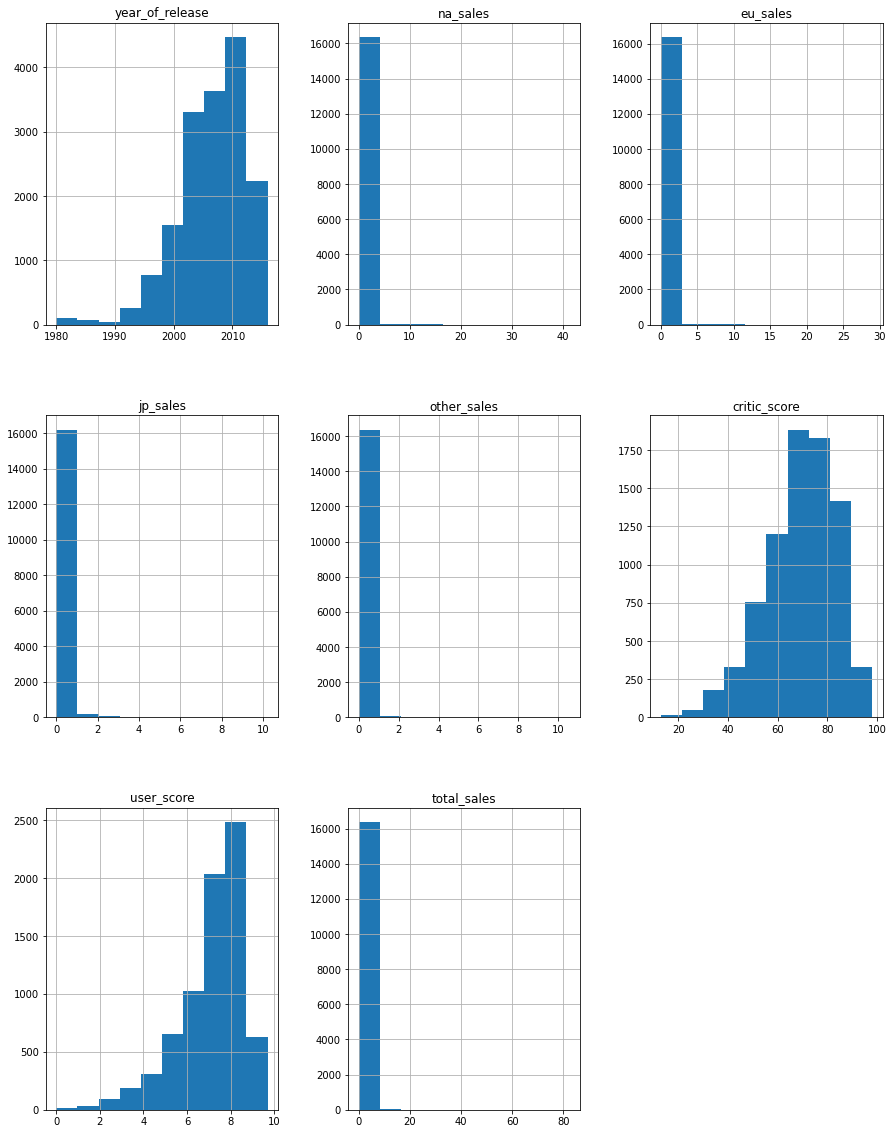

In [25]:
df.hist(figsize=(15, 20));

### Сколько игр выпускалось в разные годы. 
Важны ли данные за все периоды?!

In [26]:
# посчитаем сколько игр выпускалось в каждый год
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

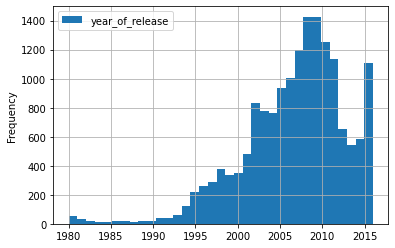

In [27]:
# построим гистограмму количества лет по годам
df.plot(kind='hist', y='year_of_release', bins=35, grid=True, legend=True);

***До 1995 г. в год выпускали менее 100 игр в год***
<br><br>
С 1995 г. количество игр выпускаемых в год росло вплоть максимуму в 2008 и 2009 г. За каждый из этих лет было выпущено более 1400 игр.
<br>
С 2010 по 2014 гг. количество игр выпускаемых в год сокращалось вплоть до ок. 600 игр в 2014, 2015 и 2016 гг.
<br>

In [28]:
df[df['year_of_release'] == 2016].shape[0]

502

### Как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам!
За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
# какие платформы представлены в df
print(sorted(df['platform'].unique()))

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [30]:
# Суммарные продажи платформ
df.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])

sum
         total_sales
platform            
2600           86.48
3DO             0.10
3DS           257.81
DC             15.95
DS            802.78
GB            254.43
GBA           312.88
GC            196.73
GEN            28.35
GG              0.04
N64           218.01
NES           251.05
NG              1.44
PC            255.76
PCFX            0.03
PS            727.58
PS2          1233.56
PS3           931.34
PS4           314.14
PSP           289.53
PSV            53.81
SAT            33.59
SCD             1.86
SNES          200.04
TG16            0.16
WS              1.42
Wii           891.18
WiiU           82.19
X360          961.24
XB            251.57
XOne          159.32

Наиболее успешными будем считать платформы с сумарными продажами за все годы более 700 игр. Это платформы:
<br>
<br>
DS, PS, PS2, PS3, Wii, X360.
<br>
<br>
Самая успешная платформа - PS2 с суммарными продажами за все годы - 1233.56 (единицы неизвестны).


In [31]:
# сделаем выборку с этими платформами
df_top_pl = df.query('platform in ["DS", "PS", "PS2", "PS3", "Wii", "X360"]')

In [32]:
df_top_pl.sort_values(by='total_sales', ascending = False).head(10)

name platform  year_of_release       genre  na_sales  \
0                  Wii Sports      Wii             2006      Sports     41.36   
2              Mario Kart Wii      Wii             2008      Racing     15.68   
3           Wii Sports Resort      Wii             2009      Sports     15.61   
6       New Super Mario Bros.       DS             2006    Platform     11.28   
7                    Wii Play      Wii             2006        Misc     13.96   
8   New Super Mario Bros. Wii      Wii             2009    Platform     14.44   
10                 Nintendogs       DS             2005  Simulation      9.05   
11              Mario Kart DS       DS             2005      Racing      9.71   
13                    Wii Fit      Wii             2007      Sports      8.92   
14         Kinect Adventures!     X360             2010        Misc     15.00   

    eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0      28.96      3.77         8.45          76.0         8.0        E   
2      12.76      3.79         3.29          82.0         8.3        E   
3      10.93      3.28         2.95          80.0         8.0        E   
6       9.14      6.50         2.88          89.0         8.5        E   
7       9.18      2.93         2.84          58.0         6.6        E   
8       6.94      4.70         2.24          87.0         8.4        E   
10     10.95      1.93         2.74           NaN         NaN  unknown   
11      7.47      4.13         1.90          91.0         8.6        E   
13      8.03      3.60         2.15          80.0         7.7        E   
14      4.89      0.24         1.69          61.0         6.3        E   

    total_sales  
0         82.54  
2         35.52  
3         32.77  
6         29.80  
7         28.91  
8         28.32  
10        24.67  
11        23.21  
13        22.70  
14        21.82

Самая продаваемая игра - Wii Sports платформы Wii. Игры о Mario платформ Wii и DS также среди наиболее продаваемых.

<AxesSubplot:xlabel='year_of_release'>

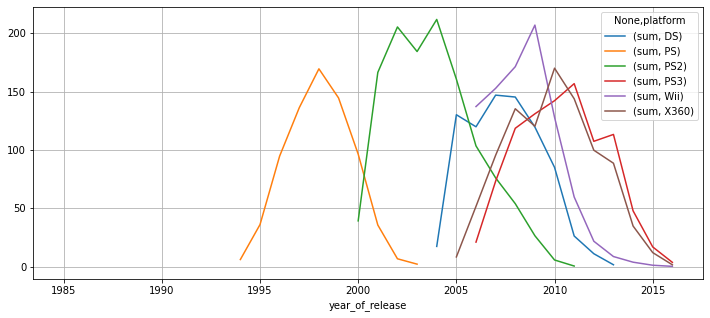

In [33]:
# Суммарные продажи топовых платформ по годам
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Text(0.5, 1.0, 'Суммарные продажи топовых платформ по годам')

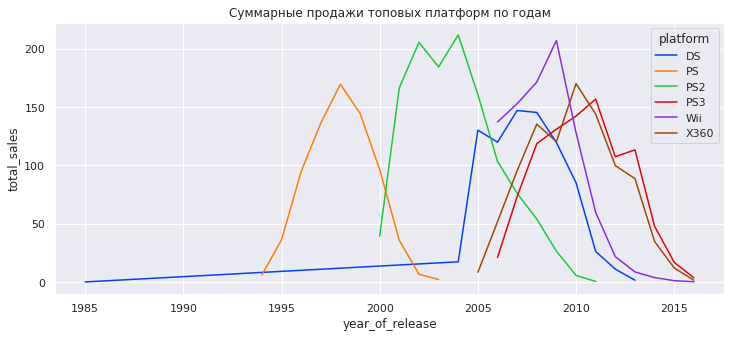

In [34]:
# устанавливаем размер графика
sns.set(rc={'figure.figsize':(12,5)})

# группируем данные для графика
top_platform = df_top_pl.groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'})
gr = sns.lineplot(
    x="year_of_release", 
    y="total_sales",
    data=top_platform,
    palette='bright',
    hue='platform');

#заголовок графика
gr.set_title('Суммарные продажи топовых платформ по годам')

In [35]:
# платформы продажи игр на которые должны расти в будущем (после 2017)
df_future = df.query('platform in ["XOne", "PS4", "PSV", "WiiU", "3DS"]')

<AxesSubplot:xlabel='year_of_release'>

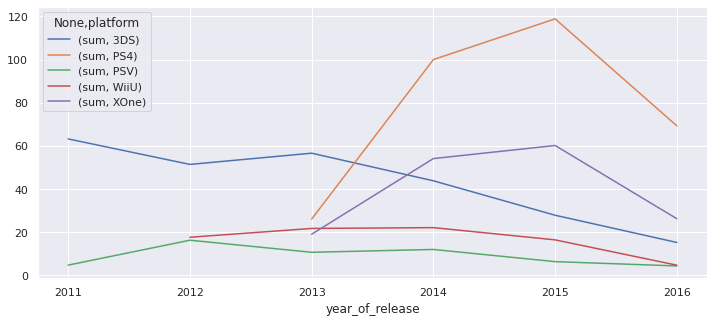

In [36]:
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

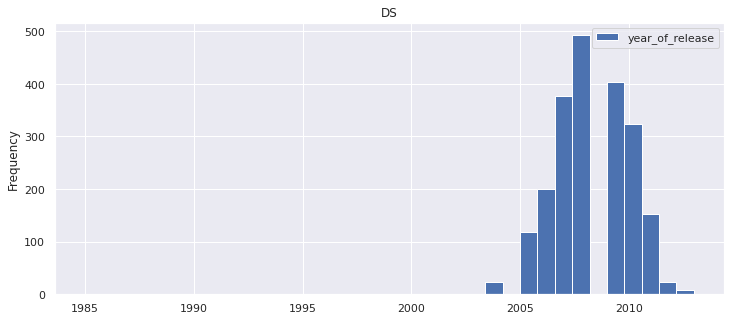

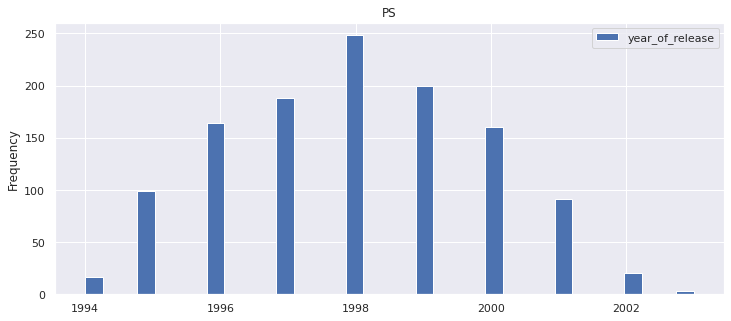

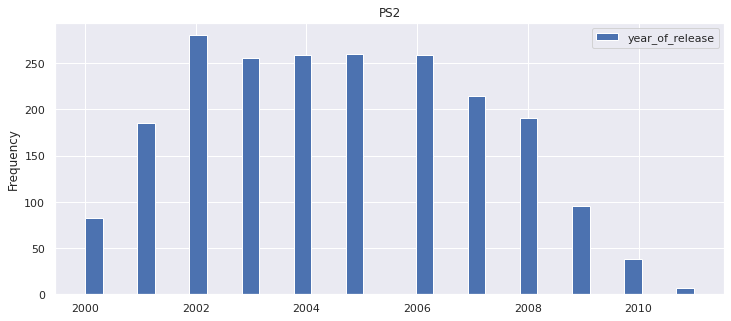

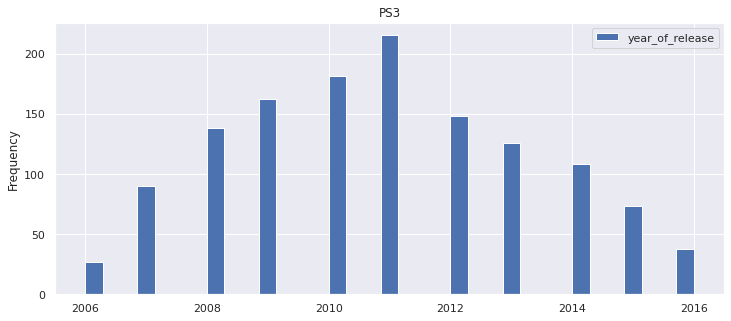

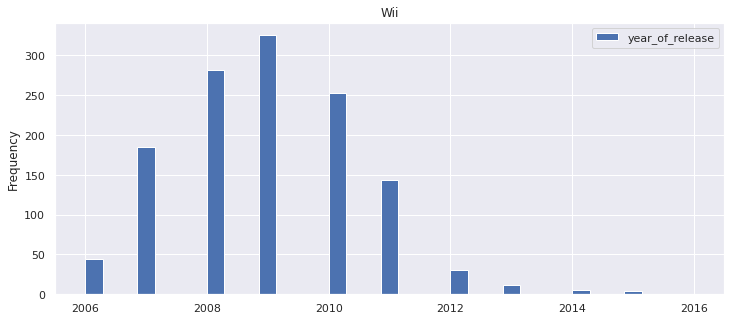

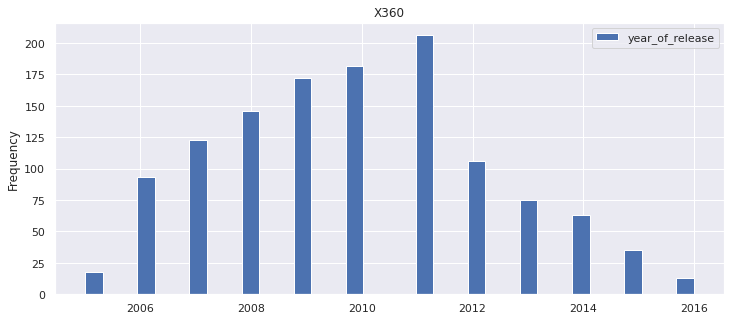

In [38]:
# для каждой топовой платформы построили гистограмму количества игр вышедших в каждый год
for name, group_df in df_top_pl.groupby('platform'):
    group_df.plot(kind='hist', y='year_of_release', bins=35, title=name);

И по суммарным продажам и по количеству выпущенных игр для самых успешных платформ видно, что срок жизни платформы ок. 10 лет, затем на излете предыдущей платформы появляется новая платформа той же фирмы (например, PS, PS2, PS3) или платформа другой фирмы. Конкурирующие платформы разных фирм появляются переживают взлет и падений примерно в один и тот же период (например PS3, X360, Wii)

In [39]:
# for name, group_df in df_top_pl.groupby('platform'):
#     group_df.plot(kind='bar', x='year_of_release', y='year_of_release', bins=35, title=name);

### Актуальный период.
Определить актуальный период (актуальный для прогноза на 2017) на основе прошлых выводов.
Неактуальный (прошлый период) исключить.

Актуальный период для прогноза продаж на 2017 г. зависит о того, по каким переменным прогнозировать:
<br>
<br>
- Если по `user_score` и `critic_score`, то начинать можно только с 2000 г, т.к. до этого оценок нет.
<br>
<br>
- Если по поличеству выпущенных игр из логики, что чем меньше игр выпущено, тем больше вероятность у каждой быть купленной, то количество выпускаемых игр в год, сопоставимое с 2014, 2015 и 2016 гг. (ок. ок. 600 игр в год) было достигнуто только в 2002, 2003 гг.
<br>
<br>
- Если по `platform`, то к 2016 г. производство и продажи игр прежде лидирующих платформ (DS, PS, PS2, PS3, Wii, X360) - на излете, поэтому необходимо будет предсказывать продажи игр обновленных платформ (XOne, PS4, PSV, WiiU, 3DS). Из графиков прежних топовых платформ видно, что максимальные суммарные продажи достигали 150 - 200 в 2010-2011 г., а после сокращались. Новые платформы пока не показали таких высоких продаж. Десятилетний цикл XOne, PS4, WiiU, 3DS начался ок. 2013 г., соответственно на 2017 и далее должен прийтись пик продаж. Пока максимумы продаж игр этих платформ не так высоки и уже начали снижаться (2015-2016 плохой период для продаж видеоиг). Возможно, перспективные платформы не покажут таких больших продаж, как предыдущее поколение платформ, возможно, пик продаж бужет отложенным. Для их цикла логичнее было бы строить предсказания начиная с 2013 и только для этих платформ. 
<br>
<br>
- Еще одно соображение - из общего графика выпуска видеоигр. Впуск находятся на на уровне 2013, 2014 г. ок. 600 игр в год - не растет и не падает. Возможно пик рынка видеоигр был пройден в 2010 г. и дальнейшая модель - колебание вокруг некоторого уровня, а не рост. Возможно сами игры игры изменились - стали сложнее, дороже в производстве, дольше в прохождении (если раньше продавали более дешевые в производстве и по цене игры с быстрым прохождением, то затем стали продавать более дорогие в производстве и по цене игры с долгим прохождением - т.е. сам рынок видеоигр изменился, а вместе с ним модель продаж и условия конкуренции). Если отступить слишком далеко назад, модель (например регрессионная может считать, что тренд выпуска игр растущий). Если игры становятся дороже и сложнее, дольше становится производство потенциальных игр-бестселлеров, значит и жизненный цикл платформ для сложных игр может удлиннятся.  
<br>
<br>
- Если предсказывать по особенно популярным и продаваемым жанрам, то вероятно компании выявили смену жанровых предпочтений с некоторым опазданием и игр нужного жанра будет больше, как и их продаж. Из графиков ниже видно, что на преждних топовых платформах пережили пик жаны: Action, Sports, Misc, Adventure. На новых платформах Action также популярнее прочих, но также растет потенциал Adventure, Shooter, Role-Playing,(эра RPG. не за горами). Sports и Misc несколько растеряли былую популярность, но держатся.
<br>
<br>
***Актуальным периодом будем считать период начиная с 2011 г.***

    

<AxesSubplot:xlabel='year_of_release'>

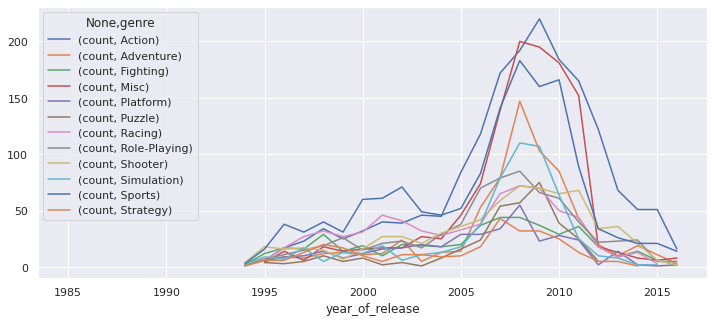

In [40]:
(
df_top_pl.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['count'])
.plot(grid=True, figsize=(12, 5))
)

На преждних топовых платформах пережили пик жаны: Action, Sports, Misc, Strategy. На новых платформах Action также популярнее прочих, но также растет потенциал Adventure, Shooter, Role-Playing. Новые жанры себя еще покажут.

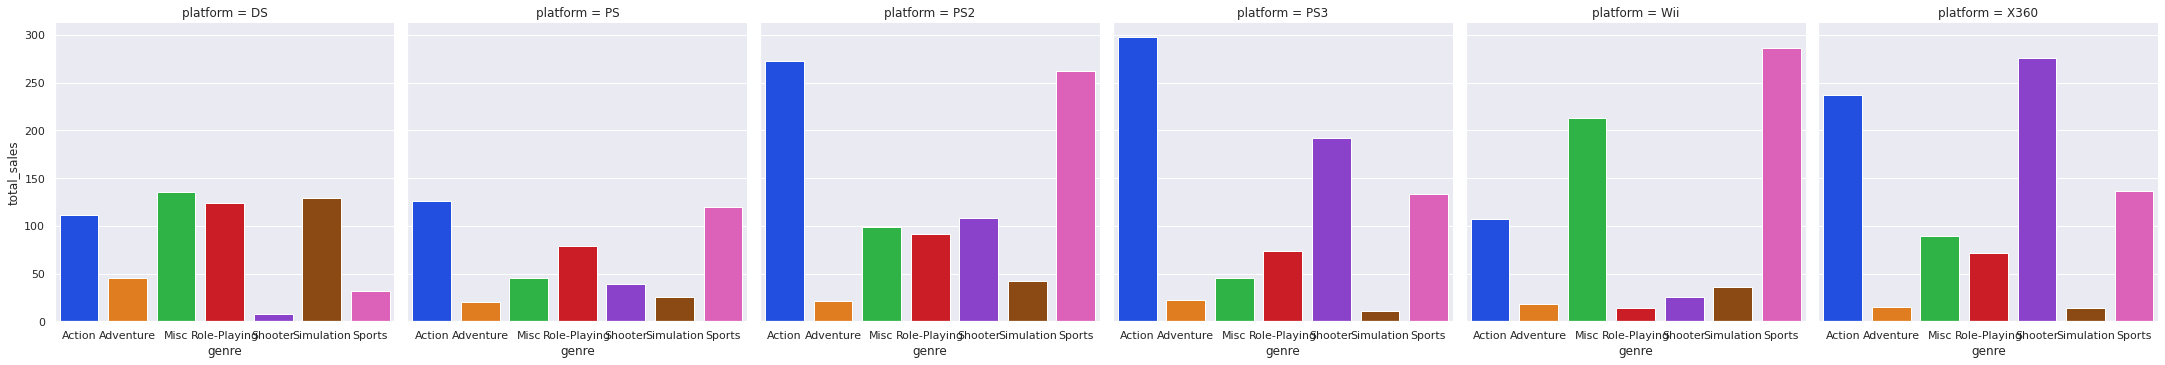

In [41]:
# выбока с самыми популярными жанрами у топовых платформ
top_pl_top_gen = df_top_pl.query('genre in ["Action", "Adventure", "Sports", "Misc", "Simulation", "Role-Playing", "Shooter"]')
top_pl_top_gen = top_pl_top_gen.groupby(['platform', 'genre'], as_index=False).agg({'total_sales': 'sum'})

sns.set(rc={'figure.figsize':(9,9)})

sns.catplot(
    x='genre', 
    y='total_sales',
    data=top_pl_top_gen,
    palette='bright',
    kind = 'bar', 
    col='platform');

У разных топовых платформ в продажах лидируют игры разного жанры. У PS3 - Action, у X360 - Shooter, Wii - Sports. Жанровые профили PS3 и X360 похожи. Wii в отличие от них сделал ставку не на Shooter, а на Misc. Самый специфичный жанровый профиль у DS (благодаря исследованию дальше понятно, что дело в том, что эта платформа особенно популярна в Японии). 

<AxesSubplot:xlabel='year_of_release'>

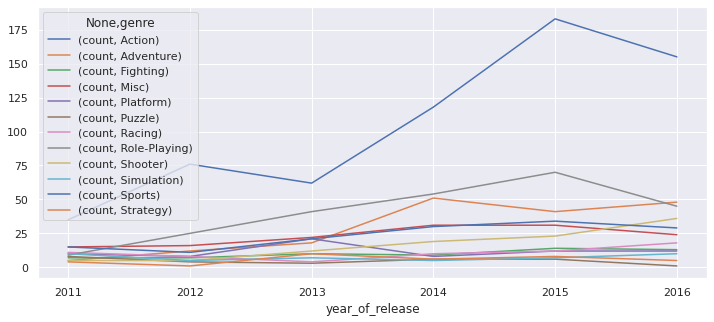

In [42]:
(
df_future.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['count'])
.plot(grid=True, figsize=(12, 5))
)

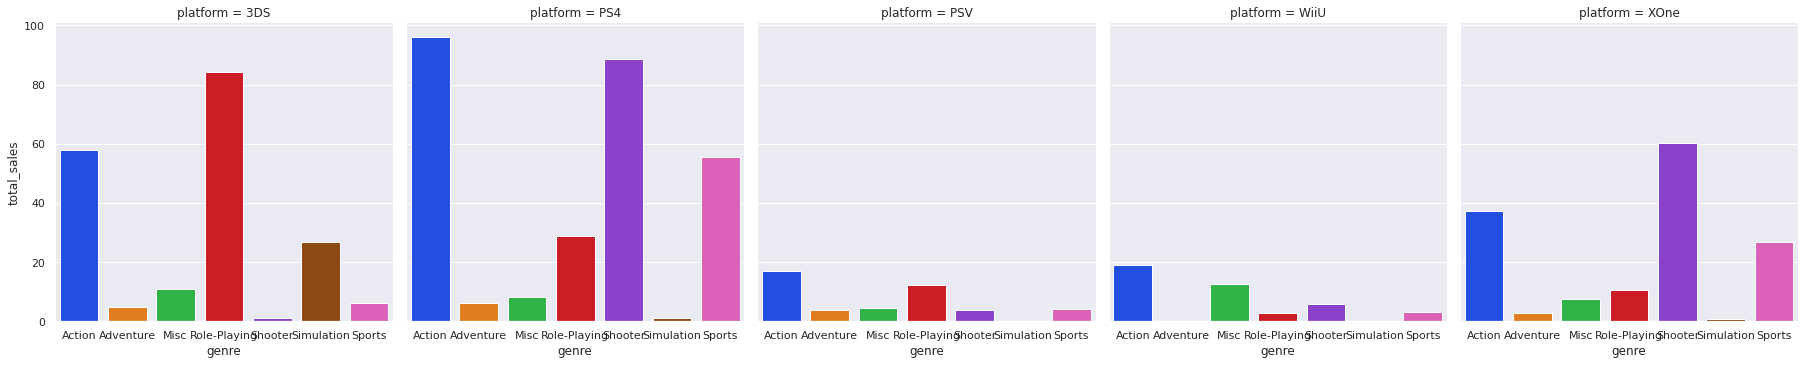

In [43]:
# выбока с самыми популярными жанрами у топовых платформ
future_top_gen = df_future.query('genre in ["Action", "Adventure", "Sports", "Misc", "Simulation", "Role-Playing", "Shooter"]')
future_top_gen = future_top_gen.groupby(['platform', 'genre'], as_index=False).agg({'total_sales': 'sum'})

sns.set(rc={'figure.figsize':(12,5)})

sns.catplot(
    x='genre', 
    y='total_sales',
    data=future_top_gen,
    palette='bright',
    kind = 'bar', 
    col='platform');

Из перспективных платформ PS4 унаследовал жанровый профиль PS3, а XOne - жанровый профиль X360, 3DS - DS. С тем отличием что суммарные продажи игр по жанрам у XOne пока заметно ниже предшествующего поколения консоли. PS4 сильно нарастил долю Shooter, возможно чтобы поконкурировать за этот жанр с XOne, 3SD - основательно ушел в Role-Playing.
<br><br>
***По продажам игр для старого поколения консолей вполне можно предсказывать продажи нового той же фирмы, с той поправкой, что фирмы по всей вероятности внимательно изучают продажи конкурентов и пытаются выявить новые популярные жанры.***

In [44]:
# оставляем только актуальный период
df = df[df['year_of_release'] >= 2011]

In [45]:
df.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      4022.000000  4022.000000  4022.000000  4022.000000  4022.000000   
mean       2013.092989     0.206305     0.166532     0.061077     0.051942   
std           1.776160     0.570441     0.482864     0.220248     0.155342   
min        2011.000000     0.000000     0.000000     0.000000     0.000000   
25%        2011.000000     0.000000     0.000000     0.000000     0.000000   
50%        2013.000000     0.040000     0.030000     0.000000     0.010000   
75%        2015.000000     0.170000     0.130000     0.050000     0.040000   
max        2016.000000     9.660000     9.090000     4.390000     3.960000   

       critic_score   user_score  total_sales  
count   1812.000000  2032.000000  4022.000000  
mean      71.274283     6.633022     0.485855  
std       13.095847     1.541293     1.219503  
min       13.000000     0.200000     0.010000  
25%       64.000000     5.800000     0.040000  
50%       74.000000     7.000000     0.130000  
75%       81.000000     7.800000     0.407500  
max       97.000000     9.300000    21.050000

### Лидирующие платформы
Выбрать несколько наиболее потенциально прибыльных платформ.

In [46]:
# Суммарные продажи платформ начиная с 2000 г.
df.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])

sum
         total_sales
platform            
3DS           257.81
DS             38.73
PC             97.68
PS2             0.45
PS3           445.57
PS4           314.14
PSP            29.01
PSV            53.81
Wii            95.02
WiiU           82.19
X360          380.38
XOne          159.32

<AxesSubplot:xlabel='year_of_release'>

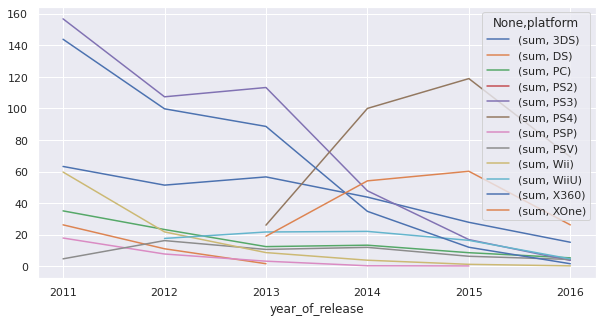

In [47]:
# еще раз проверим потенциально наиболее успешные платформы в 2017 г.
(
df.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(10, 5))
)

Потенциально наиболее прибыльные платформы в 2017 г.: PS4, XOne, WiiU, 3DS, PSV, у которых жизненный цикл начался в в 2011 и 2013 гг.
<br>
<br>
Фактически наиболее прибыльные платформы c 2000 к 2016 г.: DS, PS2, PS3, Wii, X360, у которых к 2016 г. жизненный цикл уже кончился.
<br>
<br>
2015-2016 г. плохой период для видео-игр, продажи всех плафторм (даже новых) падают, хотя выпуск игр не растет.

In [48]:
# выборка лидирующих платформ за актуальный период
df_top_pl = df.query('platform in ["DS", "PS2", "PS3", "Wii", "X360"]')
# поскольку начали с 2000 г. PS ушла из ТОПа 

In [49]:
# платформа продажи игр на которые должны расти в будущем 
df_future = df.query('platform in ["XOne", "PS4", "PSV", "WiiU", "3DS"]')

### Ящик с усами 
«ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 3.0)

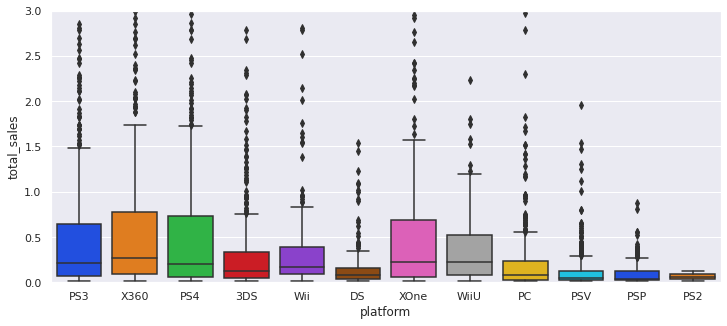

In [50]:
# Ящик с усами по всем платформам (без группировки)

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=df,
    palette='bright')
plt.ylim(0,3)

У плотностных распределений всех платформ медиана ближе к нижнему квартилю, значит в выборке за актуальный период преобладают игры с небольшими продажами, напротив количество игр бестселлеров с продажами выше 2.5 сравнительно мало (это выбросы). Если сравнивать по этим показателям Wii, X360 и PS3, то распределения продаж игр у Wii и X360 похожи - квартили (верхние и нижние, медиана ок. 0.4), у PS3 верхний квартиль чуть выше 1, и медиана чуть выше - ок 0.5.
<br><br>
У Нового поколения платформ XOne и PS4 выше наблюдаемые максимуму,а также верхние квартили. т.е. Платформы научились определять рецепт бестселлера, однако медианы по-прежнему ближе к нижнему квартилю. 

не только по медианам, и сравнивать размахи

Что общего у плотностей распределений всех платформ (обрати внимание на то к чему ближе медиана - к верхнему или нижнему квантилю)

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

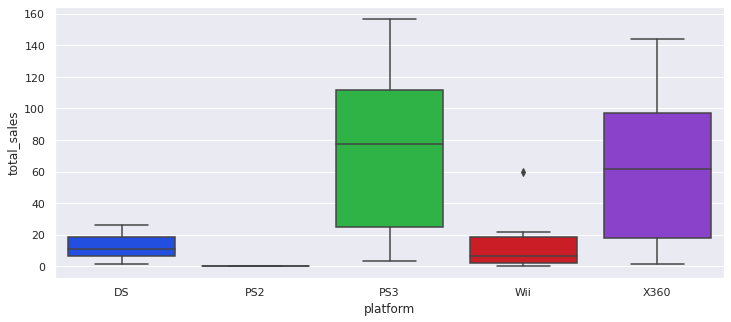

In [51]:
# ящик с усами по 5 платформам с наибольшими суммарными продажами
top_platform = df_top_pl.groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'})
sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=top_platform,
    palette='bright')

(0.0, 2.0)

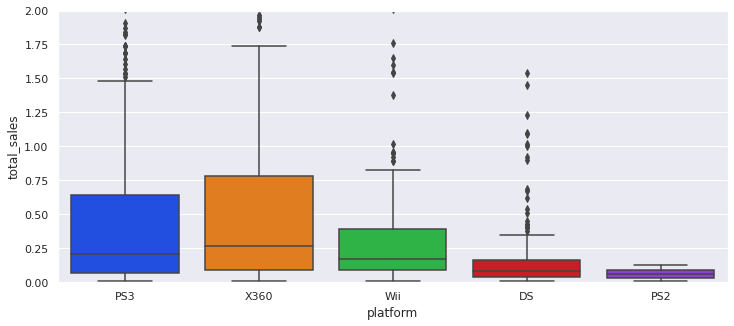

In [52]:
# ящик с усами по платформам с наибольшими родажами 

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=df_top_pl,
    palette='bright')
plt.ylim(0,2)

(0.0, 2.0)

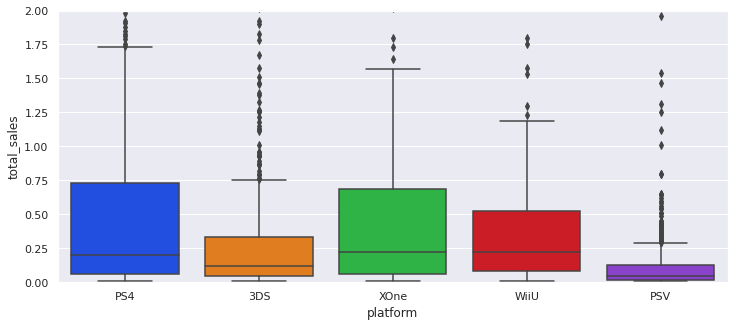

In [53]:
# ящик с усами по наиболее перспективным платформам (без группировки)

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=df_future,
    palette='bright')
plt.ylim(0,2)

(0.0, 3.0)

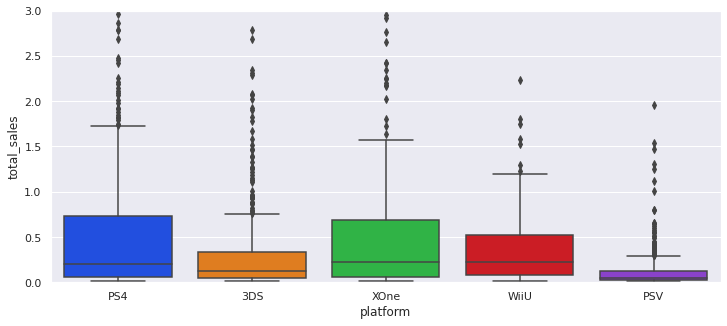

In [54]:

sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=df_future,
    palette='bright')
plt.ylim(0,3)

На 2016 г. по наиболее перспективным платформам рано делать выводы, т.к. пик их продаж еще не наступил. По тем данным, которые имеются PS4 одержал верх над XOne, а 3DS - над PSP, PSV и WiiU.

### Влияние отзывов на продажи (для одной платформы)
Как влияют отзывы пользователей и отзывы критиков для продаж одной платформы.
Диаграмма расеяния. Корреляция. Промежуточные выводы. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

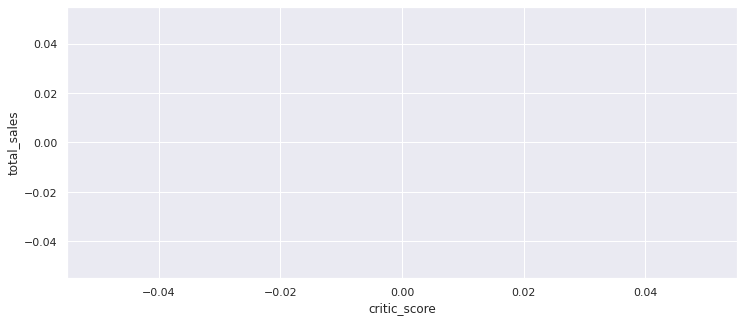

In [55]:
# Как влияют отзывы критиков на продажи платформы PS2

(
df.query('platform == "PS2"')
.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2)
)

In [56]:
print('корреляция м-ду оценками критиков и суммарными продажам PS2:', 
      df[df['platform'] == 'PS2']['critic_score'].corr(df[df['platform']== 'PS2']['total_sales']))

корреляция м-ду оценками критиков и суммарными продажам PS2: nan


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

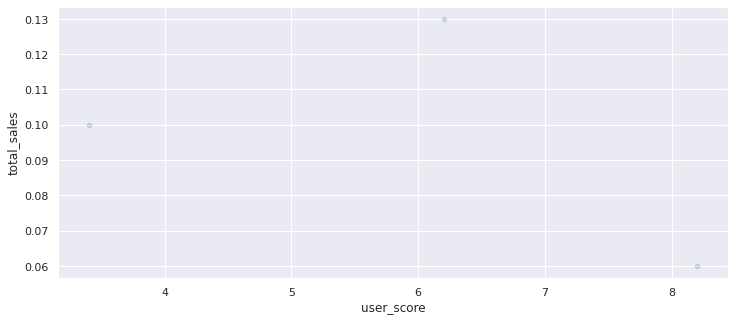

In [57]:
# Как влияют отзывы критиков на продажи платформы PS2

(
df.query('platform == "PS2"')
.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2)
)

In [58]:
print('корреляция м-ду оценками игроков и суммарными продажам PS2:', 
      df[df['platform']== 'PS2']['user_score'].corr(df[df['platform']== 'PS2']['total_sales']))

корреляция м-ду оценками игроков и суммарными продажам PS2: -0.4881435810449095


Оценки критиков влияют на продажи игр PS2 сильнее, чем оценки игроков:
<br>
корреляция м-ду оценками критиков и суммарными продажам PS2: 0.39
<br>
корреляция м-ду оценками игроков и суммарными продажам PS2: 0.18

### Влияние отзывов на продажи (для других платформ)
Соотнесите выводы с продажами игр на других платформах.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

платформа: DS корреляция оц. критиков с продажами: 0.2611658597550141
платформа: PS2 корреляция оц. критиков с продажами: nan
платформа: PS3 корреляция оц. критиков с продажами: 0.38011114718290767
платформа: Wii корреляция оц. критиков с продажами: 0.2922694954272934
платформа: X360 корреляция оц. критиков с продажами: 0.3912533245484558


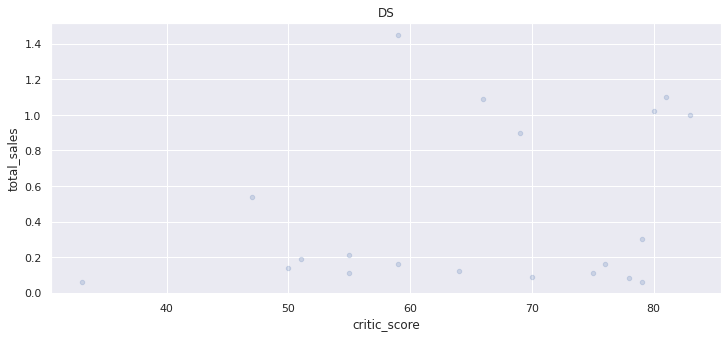

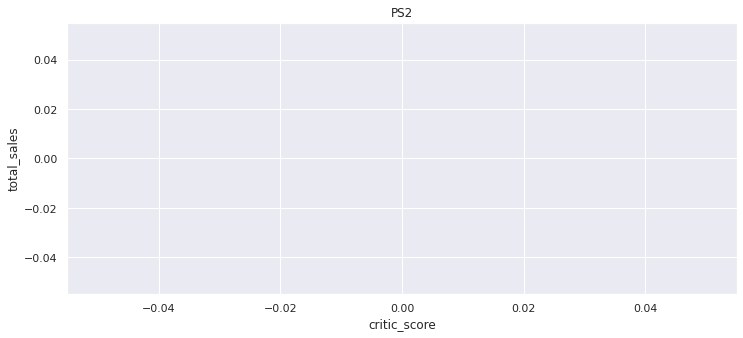

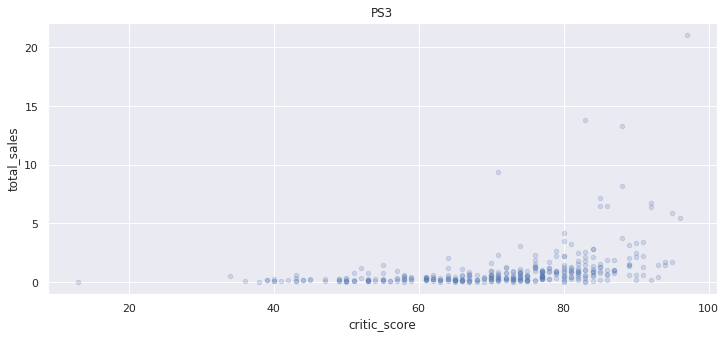

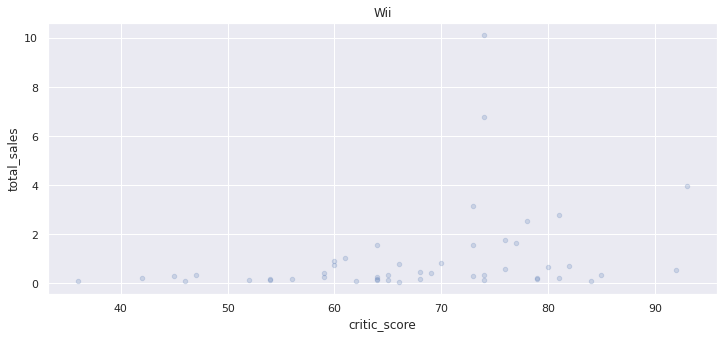

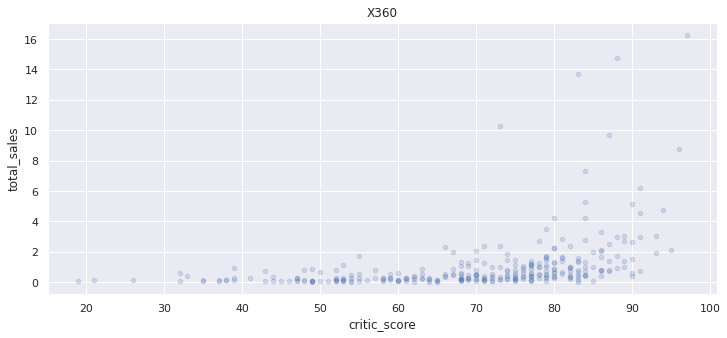

In [59]:
# посмотрим что с влиянием оценок критиков на продажи по всем наиболее успешным платформам
for name, group_df in df_top_pl.groupby('platform'):
    group_df.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, title=name);
    print("платформа:", name, "корреляция оц. критиков с продажами:",
          group_df[group_df['platform']== name]['critic_score'].corr(group_df[group_df['platform']== name]['total_sales']))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

платформа: DS корреляция оц. игроков с продажами: 0.2810294019560495
платформа: PS2 корреляция оц. игроков с продажами: -0.4881435810449095
платформа: PS3 корреляция оц. игроков с продажами: 0.014089348308019396
платформа: Wii корреляция оц. игроков с продажами: 0.14550376734945006
платформа: X360 корреляция оц. игроков с продажами: 0.03891817072910255


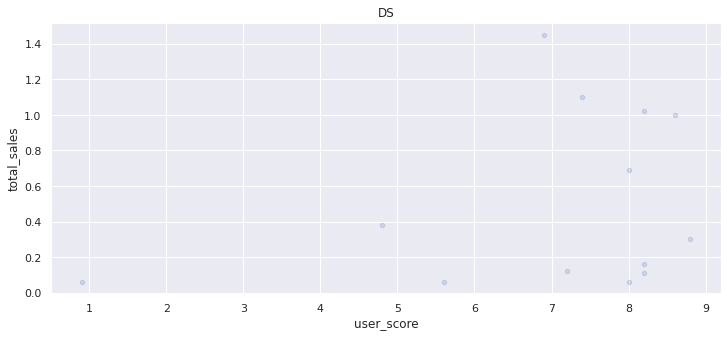

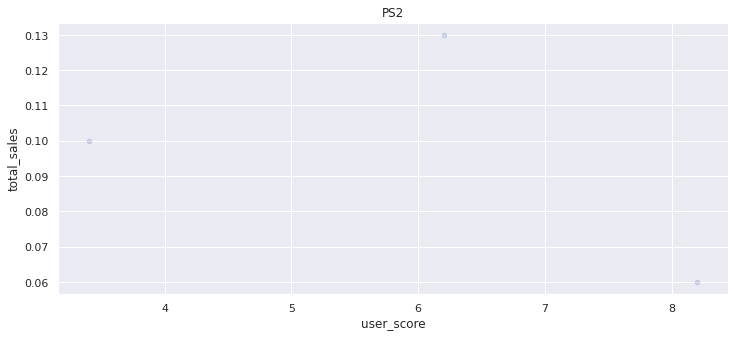

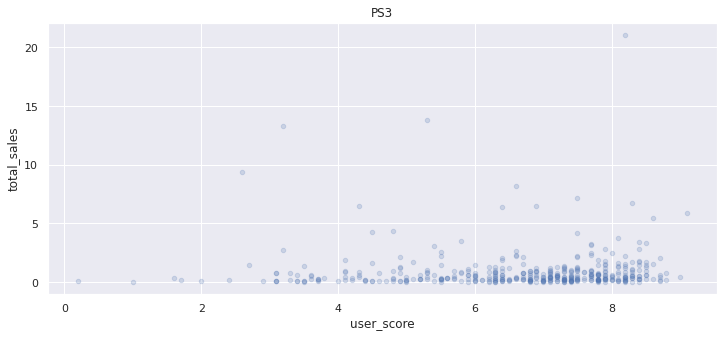

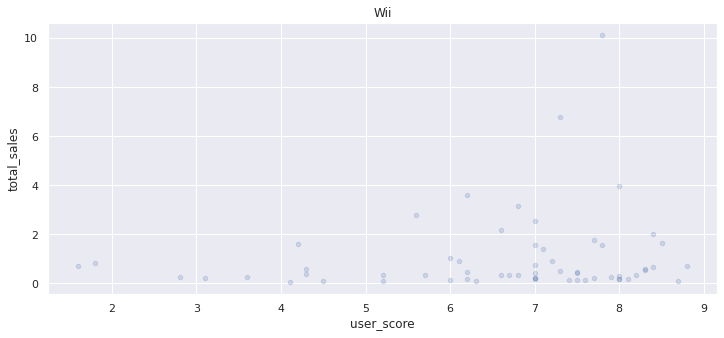

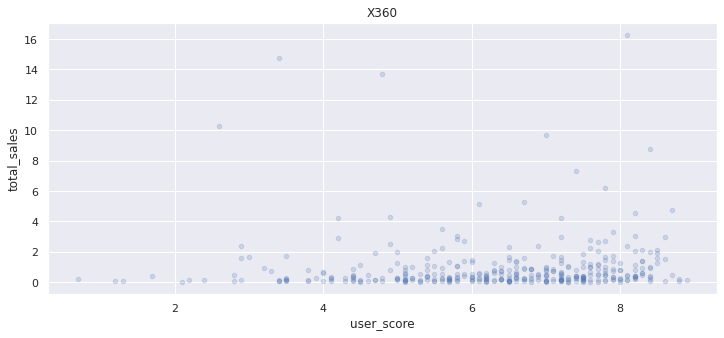

In [60]:
# посмотрим, что с оценками игроков по всем платформам
for name, group_df in df_top_pl.groupby('platform'):
    group_df.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, title=name);
    print("платформа:", name, "корреляция оц. игроков с продажами:", 
          group_df[group_df['platform']== name]['user_score'].corr(group_df[group_df['platform']== name]['total_sales']));

**Промежуточный вывод о влиянии отзывов на продажи наиболее успешных платформ:**
<br>
<br>
Фирма Sony, разрабатывающая платформы PS, явно первая уловила, связь между высокими оценками критиков и высокими продажами. Для каждого следующего поколения платформ PS корреляция между оценками критиков и продажами была выше:
<br>
платформа PS корреляция оц. критиков с продажами: 0.30,
<br>
платформа PS2 корреляция оц. критиков с продажами: 0.39,
<br>
платформа PS3 корреляция оц. критиков с продажами: 0.43.
<br>
<br>
Единственной платформой, с сопоставимо высокой корреляцией оценок критиков с продажами была X360
<br>
платформа: X360 корреляция оц. критиков с продажами: 0.39.
<br>
Возможно дело в том, что у PS2 и X360 похожий набор игр. Возможно, разрабатывая игры платформы стали руководствоваться оценками и отзывами критиков. Возможно, стали платить критикам за высокие оценки.
<br>
<br>
Сопоставимой положительной корреляции м-ду оценками игроков и продажами игр нет ни у одной платформы. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

платформа: 3DS корреляция оц. критиков с продажами: 0.3487397305984834
платформа: PS4 корреляция оц. критиков с продажами: 0.40656790206178095
платформа: PSV корреляция оц. критиков с продажами: 0.13176292727608935
платформа: WiiU корреляция оц. критиков с продажами: 0.34837976012017485
платформа: XOne корреляция оц. критиков с продажами: 0.4169983280084017


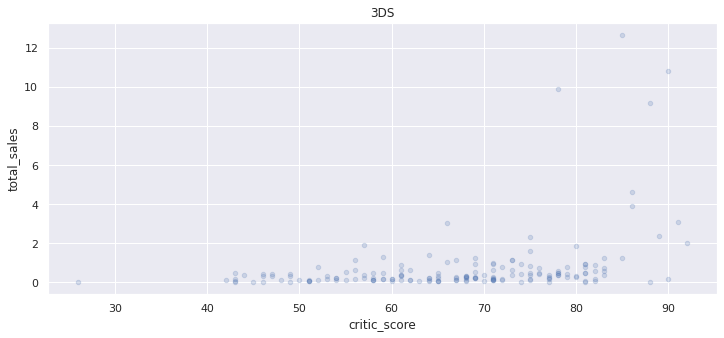

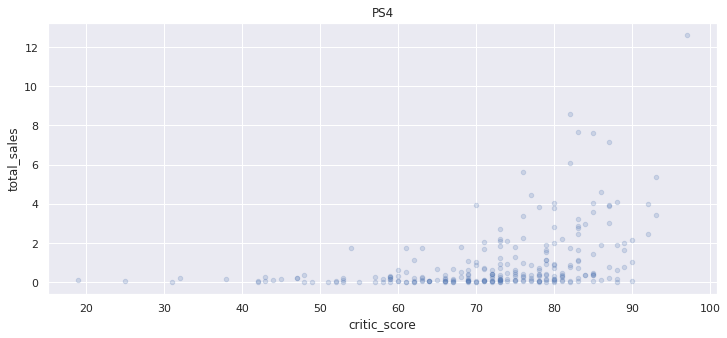

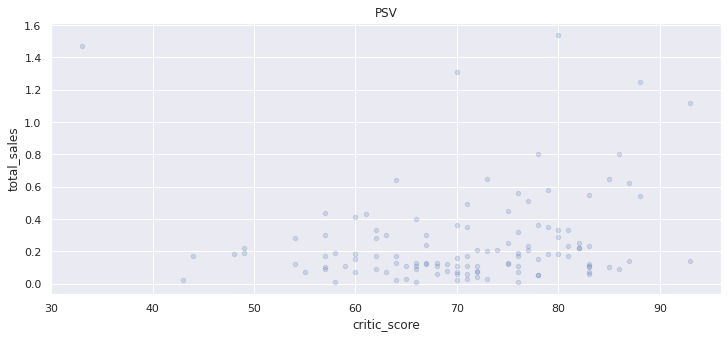

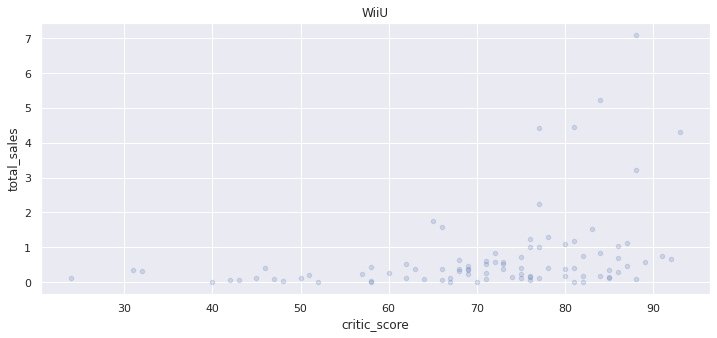

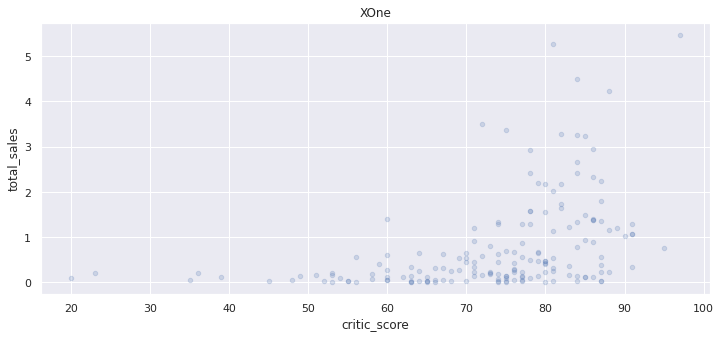

In [61]:
# посмотрим, что с влиянием оценок критиков на продажи по наиболее перспективным платформам
for name, group_df in df_future.groupby('platform'):
    group_df.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, title=name);
    print("платформа:", name, "корреляция оц. критиков с продажами:", 
          group_df[group_df['platform']== name]['critic_score'].corr(group_df[group_df['platform']== name]['total_sales']))

**Промежуточный вывод о влиянии оценок на продажи перспективных платформ:**
<br>
<br>
PS4 и XOne продолжили внимательно относится к оценкам критиков:
<br>
платформа PS4 корреляция оц. критиков с продажами: 0.41
<br>
платформа XOne корреляция оц. критиков с продажами: 0.42
<br>
<br>
Однако корреляция не выше, чем были у PS3, не выше 0.4. Высокие оценки критиков не всесильны, на продажи игр влияют и другие факторы.
<br>
<br>
Платформы 3DS, PSP и WiiU также стали внимательны к оценкам критиков (присоединились к гонке за высокие оценки):
<br>
платформа 3DS корреляция оц. критиков с продажами: 0.35
<br>
платформа WiiU корреляция оц. критиков с продажами: 0.35
<br>
платформа PSP корреляция оц. критиков с продажами: 0.32
<br>
<br>
Платформа WiiU также стала внимательна к оценкам пользователей, для них у этой платформы появилась корреляция с продажами сопоставимая с корреляцией оценок критиков с продажами.
<br>
платформа WiiU корреляция оц. игроков с продажами: 0.4

Медиана по оценкам пользователей 8 из 10, в по оценкам критиков 70 из 100, т.е. если нормировать оценки, то оценки критиков ниже. Медиана в продажах по всем платформам (ящик с усами) также ближе к нижнему квартилю. 
<br><br>
Корреляция не означает причинно-следственной связи.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

платформа: 3DS корреляция оц. игроков с продажами: 0.22207843643390882
платформа: PS4 корреляция оц. игроков с продажами: -0.031957110204556376
платформа: PSV корреляция оц. игроков с продажами: 0.0134887568358865
платформа: WiiU корреляция оц. игроков с продажами: 0.4002190202148617


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


платформа: XOne корреляция оц. игроков с продажами: -0.06892505328279414


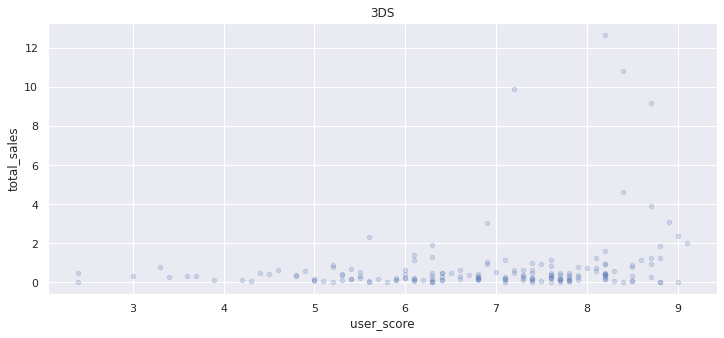

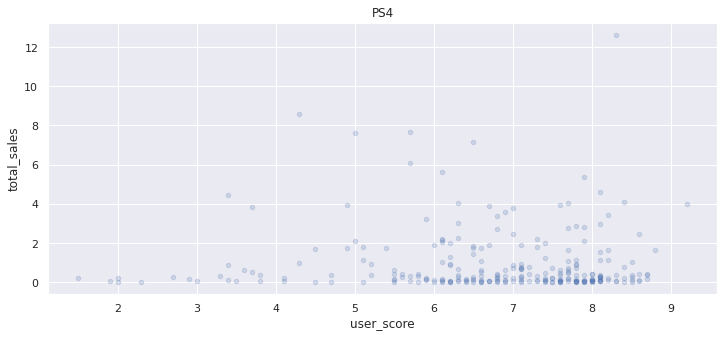

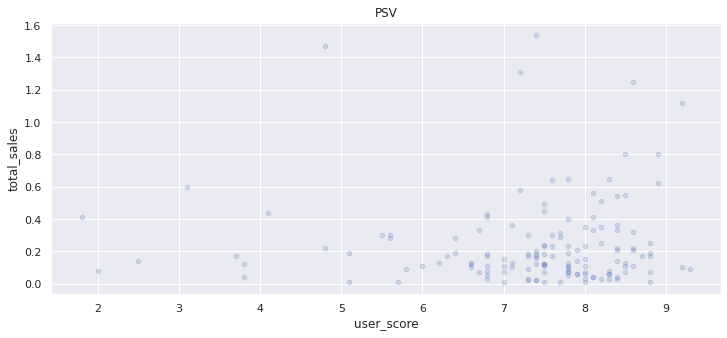

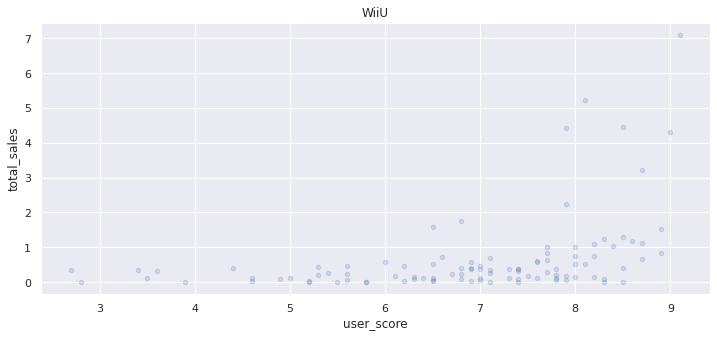

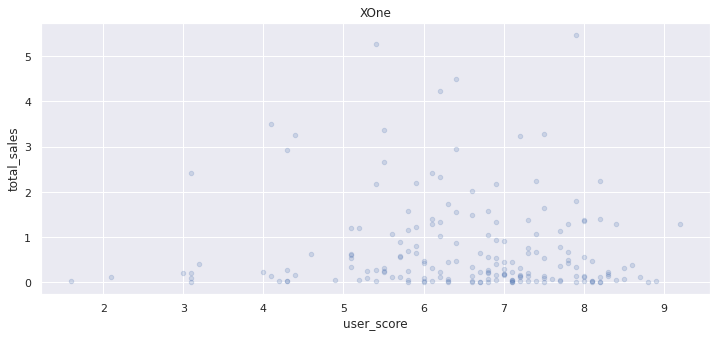

In [62]:
# посмотрим, что с влиянием оценок игроков на продажи по наиболее перспективным платформам
for name, group_df in df_future.groupby('platform'):
    group_df.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, title=name);
    print("платформа:", name, "корреляция оц. игроков с продажами:", 
          group_df[group_df['platform']== name]['user_score'].corr(group_df[group_df['platform']== name]['total_sales']))

### Жанры
<br>
Общее распределение игр по жанрам (гистограмма?)
<br>
Какие жанры самые прибыльные?
<br>
Выделяются ли жанры с высокими и низкими продажами?

In [63]:
# какие жанры представлены в df
print(sorted(df['genre'].unique()))

['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


In [64]:
df.head()

name platform  year_of_release         genre  \
16              Grand Theft Auto V      PS3             2013        Action   
23              Grand Theft Auto V     X360             2013        Action   
29  Call of Duty: Modern Warfare 3     X360             2011       Shooter   
31       Call of Duty: Black Ops 3      PS4             2015       Shooter   
33             Pokemon X/Pokemon Y      3DS             2013  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
29      9.04      4.24      0.13         1.32          88.0         3.4   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   

     rating  total_sales  
16        M        21.05  
23        M        16.27  
29        M        14.73  
31  unknown        14.63  
33  unknown        14.60

In [65]:
# распределение выпущенных игр по жанрам
df.pivot_table(index='genre', values='name', aggfunc=['count'])

count
              name
genre             
Action        1269
Adventure      410
Fighting       159
Misc           375
Platform       122
Puzzle          71
Racing         180
Role-Playing   465
Shooter        329
Simulation     136
Sports         389
Strategy       117

Самый популярный жарн актуального периода - Action (начиная с 2000 вышло более 3000 игр этого жанра).
<br><br>
Затем идут Sports (1979 игр) и Misc (1597 игр). Пик их популярности пришелся на на 2008-2010 гг., после 2010 популярность упала и не восстановилась. 
<br><br>
Затем Role-Playing (1300 игр), Adventure(1194 игры), Shooter(1129), Racing(1035).
<br><br>
Как следует из графика выше для наиболее перспективных платформ в будущем (PS4, XOne, WiiU, 3DS, PSV) растет впуск игр следующих жанров: Role-Playing, Shooter, Adventure. Наиболее популярным остается Action.
<br><br>
Наимение популярные жанры: Puzzle (479 игр) и Strategy (550 игр) - они не про игровые консоли. Странно, что рядом и Fighting - всего (640 игр).
<br>
Возможно Fighting не много, но они хорошо продаются.

<AxesSubplot:xlabel='year_of_release'>

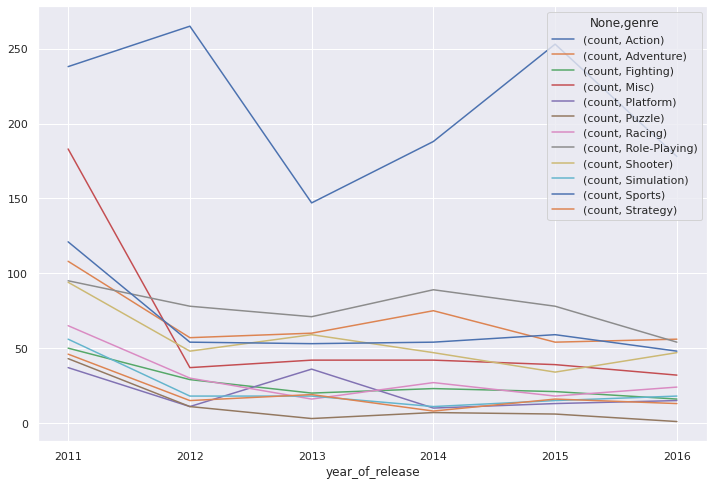

In [66]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='name', aggfunc=['count'])
.plot(grid=True, figsize=(12, 8))
)

In [67]:
df.pivot_table(index='genre', values='total_sales', aggfunc=['sum','mean','median','max','min'])

sum        mean      median         max         min
             total_sales total_sales total_sales total_sales total_sales
genre                                                                   
Action            557.80    0.439559       0.130       21.05        0.01
Adventure          45.04    0.109854       0.030        3.17        0.01
Fighting           66.90    0.420755       0.180        7.55        0.01
Misc              139.42    0.371787       0.130       10.12        0.01
Platform           88.68    0.726885       0.185       10.81        0.01
Puzzle              9.85    0.138732       0.050        1.78        0.01
Racing             88.31    0.490611       0.160       12.65        0.01
Role-Playing      245.63    0.528237       0.150       14.60        0.01
Shooter           402.91    1.224650       0.410       14.73        0.01
Simulation         50.26    0.369559       0.110        9.17        0.01
Sports            237.15    0.609640       0.200        8.58        0.01
Strategy           22.16    0.189402       0.080        1.67        0.01

Суммарные продажи выше всего у игр жанра Action (557.80) и Shooter (402.91), а ниже всего у Strategy (22.16) и Puzzle (9.85). Игр Action и Sports и выпускали много начиная с 2000 г. и продавались они хорошо, при этом если посмотрить на средние показатели, для игр соответствующих жанров, то они не такие выдающиеся, т.е. явно были игры-бестселлеры соответствующих жанров (с очень высокими продажами) и игры-аутсайдеры с плохими продажами.
<br>
Для жанра Action бестселер - серия игр GTA, для жанра Sports - игры платформы Wii Sports и Fit (по-видимому, с пультом кинетик).  
<br><br>
Суммарные продажи жанров Shooter (402.91), Role-Playing (245.63), Platform (88.68), не так высоки, однако в среднем они выше, чем у жанров выше, т.е. явных игр-аусайдеров меньше, хотя может и игр-бестселлров тоже:  Shooter - средние продажи 1.22, Platform - средние продажи 0.7. По медианным продажам эти жанры также выделяются. У игр жанров Shooter, действительно нет выдающегося бестселлера, сопоставимого по максимальным продажам с бестселлерами жанров Action и Sports. Для жанра Platform - это игры про Mario платформ DS и Wii. 
<br><br>
Fighting, и выпускается не много и продается не слишком хорошо. 

In [68]:
# бестселлеры для жанра Action
df[df['genre'] == 'Action'].sort_values(by='total_sales', ascending = False).head(10)

name platform  year_of_release   genre  \
16               Grand Theft Auto V      PS3             2013  Action   
23               Grand Theft Auto V     X360             2013  Action   
42               Grand Theft Auto V      PS4             2014  Action   
81                   FIFA Soccer 13      PS3             2012  Action   
118  Uncharted 3: Drake's Deception      PS3             2011  Action   
127            Assassin's Creed III      PS3             2012  Action   
149                  The Last of Us      PS3             2013  Action   
164             Batman: Arkham City      PS3             2011  Action   
165              Grand Theft Auto V     XOne             2014  Action   
176            Assassin's Creed III     X360             2012  Action   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16       7.02      9.09      0.98         3.96          97.0         8.2   
23       9.66      5.14      0.06         1.41          97.0         8.1   
42       3.96      6.31      0.38         1.97          97.0         8.3   
81       1.06      5.01      0.13         1.97          88.0         6.6   
118      2.77      2.75      0.19         1.03          92.0         8.3   
127      2.64      2.52      0.16         1.12          85.0         6.9   
149      2.41      2.18      0.28         0.99          95.0         9.1   
164      2.71      1.85      0.11         0.81          96.0         8.6   
165      2.81      2.19      0.00         0.47          97.0         7.9   
176      3.13      1.69      0.03         0.44          84.0         6.7   

    rating  total_sales  
16       M        21.05  
23       M        16.27  
42       M        12.62  
81       E         8.17  
118      T         6.74  
127      M         6.44  
149      M         5.86  
164      T         5.48  
165      M         5.47  
176      M         5.29

In [69]:
# аутсайдеры для жанра Action
df[df['genre'] == 'Action'].sort_values(by='total_sales', ascending = True).head(10)

name platform  year_of_release   genre  \
16710        Samurai Warriors: Sanada Maru      PS3             2016  Action   
16211                   GoGo's Crazy Bones       DS             2012  Action   
16212             Norn + Nonette: Last Era      PSV             2015  Action   
16219                           Fuuraiki 3      PSV             2015  Action   
16225                 Ninja Gaiden Sigma 2      PSV             2013  Action   
16228        Big Hero 6: Battle in the Bay      3DS             2014  Action   
16248  Azure Striker Gunvolt: Striker Pack      3DS             2016  Action   
16264                           Worms: WMD     XOne             2016  Action   
16270                         Hyakka Yakou      PSV             2015  Action   
16296               Hakuoki: Reimeiroku DS       DS             2012  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           NaN         NaN   
16211      0.00      0.01      0.00          0.0           NaN         NaN   
16212      0.00      0.00      0.01          0.0           NaN         NaN   
16219      0.00      0.00      0.01          0.0           NaN         NaN   
16225      0.00      0.00      0.01          0.0           NaN         NaN   
16228      0.00      0.01      0.00          0.0           NaN         NaN   
16248      0.00      0.00      0.01          0.0           NaN         NaN   
16264      0.01      0.00      0.00          0.0          75.0         8.1   
16270      0.00      0.00      0.01          0.0           NaN         NaN   
16296      0.00      0.00      0.01          0.0           NaN         NaN   

        rating  total_sales  
16710  unknown         0.01  
16211        E         0.01  
16212  unknown         0.01  
16219  unknown         0.01  
16225  unknown         0.01  
16228  unknown         0.01  
16248        T         0.01  
16264     E10+         0.01  
16270  unknown         0.01  
16296  unknown         0.01

In [70]:
# бестселлеры для жанра Sports
df[df['genre'] == 'Sports'].sort_values(by='total_sales', ascending = False).head(10)

name platform  year_of_release  \
77                                          FIFA 16      PS4             2015   
94                                          FIFA 17      PS4             2016   
122                                         FIFA 12      PS3             2011   
126                                         FIFA 14      PS3             2013   
143                                         FIFA 15      PS4             2014   
264                                         FIFA 15      PS3             2014   
271                                         FIFA 14     X360             2013   
278                                         FIFA 12     X360             2011   
314                                        NBA 2K16      PS4             2015   
333  Mario & Sonic at the London 2012 Olympic Games      Wii             2011   

      genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
77   Sports      1.12      6.12      0.06         1.28          82.0   
94   Sports      0.66      5.75      0.08         1.11          85.0   
122  Sports      0.84      4.30      0.11         1.39           NaN   
126  Sports      0.78      4.24      0.07         1.37          86.0   
143  Sports      0.80      4.33      0.05         0.90          82.0   
264  Sports      0.58      3.02      0.04         0.64           NaN   
271  Sports      0.92      2.89      0.01         0.40          84.0   
278  Sports      0.84      2.78      0.02         0.53           NaN   
314  Sports      2.49      0.66      0.03         0.69          87.0   
333  Sports      1.12      1.87      0.27         0.45           NaN   

     user_score   rating  total_sales  
77          4.3        E         8.58  
94          5.0        E         7.60  
122         NaN  unknown         6.64  
126         4.3        E         6.46  
143         5.7        E         6.08  
264         4.5        E         4.28  
271         4.2        E         4.22  
278         NaN  unknown         4.17  
314         6.7     E10+         3.87  
333         NaN  unknown         3.71

In [71]:
# бестселлеры для жанра Platform
df[df['genre'] == 'Platform'].sort_values(by='total_sales', ascending = False).head(10)

name platform  year_of_release     genre  \
53           Super Mario 3D Land      3DS             2011  Platform   
62       New Super Mario Bros. 2      3DS             2012  Platform   
185      New Super Mario Bros. U     WiiU             2012  Platform   
260         Super Mario 3D World     WiiU             2013  Platform   
394            LittleBigPlanet 2      PS3             2011  Platform   
424            Super Mario Maker     WiiU             2015  Platform   
720            New Super Luigi U     WiiU             2013  Platform   
766        Skylanders SWAP Force      Wii             2013  Platform   
908            LittleBigPlanet 3      PS4             2014  Platform   
912  Donkey Kong Country Returns      3DS             2013  Platform   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
53       4.89      3.00      2.14         0.78          90.0         8.4   
62       3.66      3.14      2.47         0.63          78.0         7.2   
185      2.30      1.34      1.27         0.32          84.0         8.1   
260      2.11      1.16      0.73         0.32          93.0         9.0   
394      1.83      1.05      0.06         0.46          91.0         8.4   
424      1.18      0.89      0.94         0.20          88.0         8.7   
720      1.25      0.62      0.18         0.18          77.0         7.9   
766      1.21      0.75      0.00         0.19           NaN         6.6   
908      0.66      0.93      0.01         0.31          79.0         7.1   
912      0.74      0.62      0.41         0.13           NaN         NaN   

      rating  total_sales  
53         E        10.81  
62         E         9.90  
185        E         5.23  
260        E         4.32  
394        E         3.40  
424        E         3.21  
720        E         2.23  
766     E10+         2.15  
908        E         1.91  
912  unknown         1.90

<AxesSubplot:xlabel='year_of_release'>

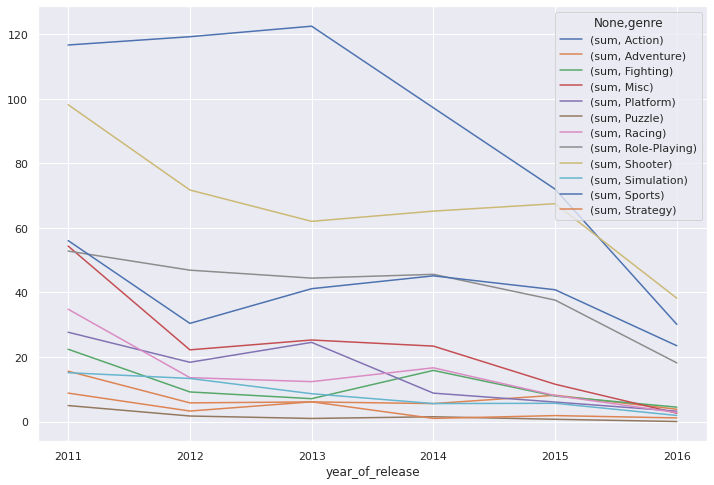

In [72]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)

<AxesSubplot:xlabel='year_of_release'>

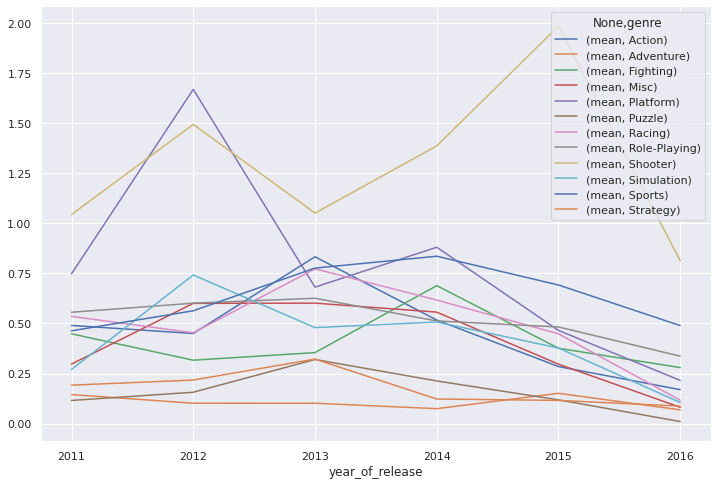

In [73]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)

График средних суммарных продаж по жанрам показывает, что в плохие времена для продаж видеоигр игры жанра Shooter хороши тем, что бестселлера, который принесет много денег, может и не сделать, но в в среднем высокие продажи для этого жанра гарантируют, что производство игры этого жанра не будет убыточным. Еще одним подобным жанром на худой конец, что было не стал Platform (для игр этого жанар плохой период начался еще в 2013 г.). 
<br><br>
Средние по жарну Sports за 2014 г. и далее высоко ударжала Fifa (это бестселлер), поэтому для плохих времен по продажам не лучший вариан: вдруг бестселлера не выйдет, а конкурентов много.


Медиана должна быть ближе к верхнему квартилю, наблюдаемый минимум близко к нижнему квартилю.

#### Платформы, жанры и оценки критиков

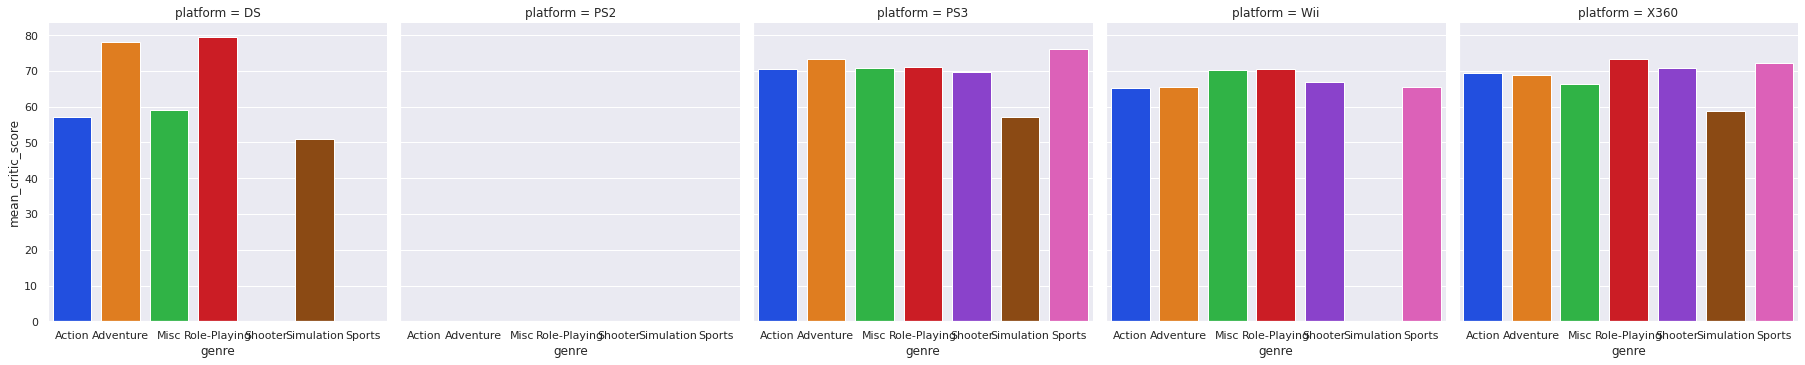

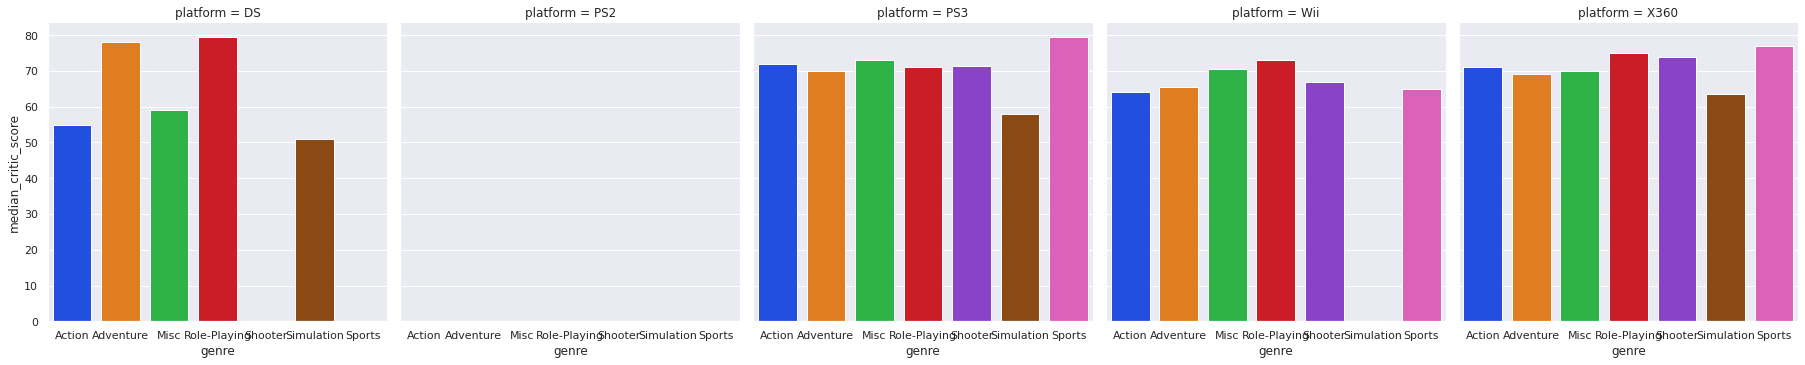

In [74]:
# выбока с самыми популярными жанрами у топовых платформ
top_pl_top_gen = df_top_pl.query('genre in ["Action", "Adventure", "Sports", "Misc", "Simulation", "Role-Playing", "Shooter"]')
top_pl_top_gen = top_pl_top_gen.groupby(['platform', 'genre'], as_index=False).agg(mean_critic_score=('critic_score', 'mean'))


sns.catplot(
    x='genre', 
    y='mean_critic_score',
    data=top_pl_top_gen,
    palette='bright',
    kind = 'bar', 
    col='platform');

top_pl_top_gen2 = df_top_pl.query('genre in ["Action", "Adventure", "Sports", "Misc", "Simulation", "Role-Playing", "Shooter"]')
top_pl_top_gen2 = top_pl_top_gen2.groupby(['platform', 'genre'], as_index=False).agg(median_critic_score=('critic_score', 'median'))

sns.catplot(
    x='genre', 
    y='median_critic_score',
    data=top_pl_top_gen2,
    palette='bright',
    kind = 'bar', 
    col='platform');


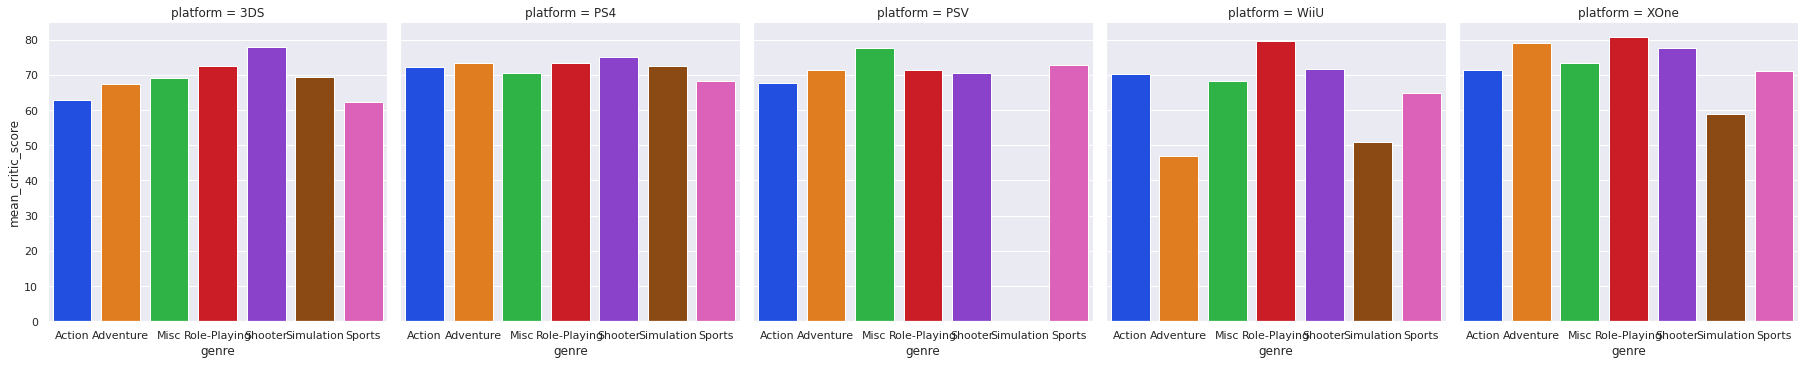

In [75]:
# выбока с самыми популярными жанрами у топовых платформ
future_top_gen = df_future.query('genre in ["Action", "Adventure", "Sports", "Misc", "Simulation", "Role-Playing", "Shooter"]')
future_top_gen = future_top_gen.groupby(['platform', 'genre'], as_index=False).agg(mean_critic_score=('critic_score', 'mean'))

sns.set(rc={'figure.figsize':(12,5)})

sns.catplot(
    x='genre', 
    y='mean_critic_score',
    data=future_top_gen,
    palette='bright',
    kind = 'bar', 
    col='platform');

PS4 увеличила продажи жанра Shooter по сравнению с прошлым поколением и оценки критиков этого жанра по сравнению с прошлым поколением (PS3) выше. Однако средние оценки критиков у XOne в жанрах Adventure, Misc, Shooter и Sports выше, чем у PS4, однако продажи во всех этих жанрах выше у PS4. Т.е. отзывы критиков не так хорошо объясняют продажи. (Надо проверять гипотезы о равенстве средних отзывов критиков в топовых жанрах для PS4 и XOne).


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




</div>


## Портрет пользователя каждого региона

### Северная Америка

#### Платформы

In [76]:
df_na = df_top_pl.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])
df_na


sum
         na_sales
platform         
DS          18.86
PS2          0.13
PS3        168.26
Wii         48.56
X360       226.80

<AxesSubplot:ylabel='Мировой Топ-5 в Северной Америке'>

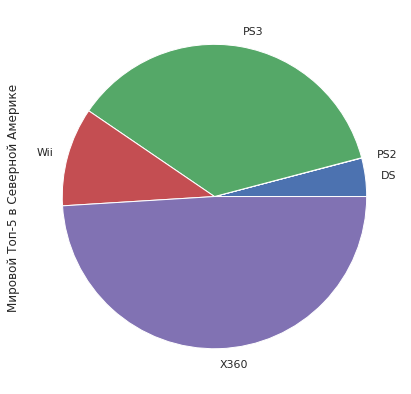

In [77]:
df_na = df_top_pl.groupby('platform').agg({'na_sales': 'sum'})
df_na.plot(kind='pie', y='na_sales', figsize=(7, 7), legend=False, 
           label='Мировой Топ-5 в Северной Америке')

<AxesSubplot:ylabel='Локальный Топ-5 и все прочие в Северной Америке'>

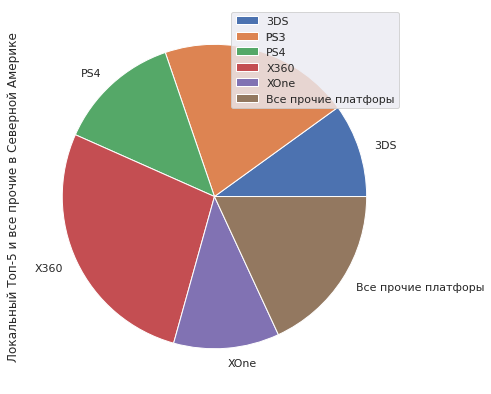

In [78]:
# доли самых популярных платформ среди всех платформ за весь период с 2000 г.
df_na2 = df.groupby('platform', as_index=False).agg({'na_sales': 'sum'})
df_na2['platform'] = df_na2.where(df_na2['na_sales'] >= 50, 'Все прочие платфоры')
df_na2 = df_na2.groupby('platform').agg({'na_sales': 'sum'})
df_na2.plot(kind='pie', y='na_sales', figsize=(7, 7), legend=True, 
            label='Локальный Топ-5 и все прочие в Северной Америке')

<AxesSubplot:xlabel='year_of_release'>

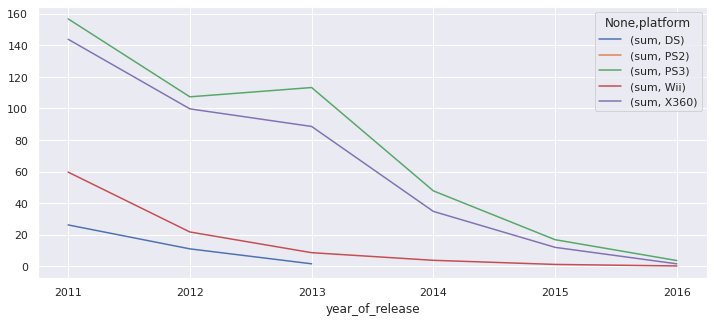

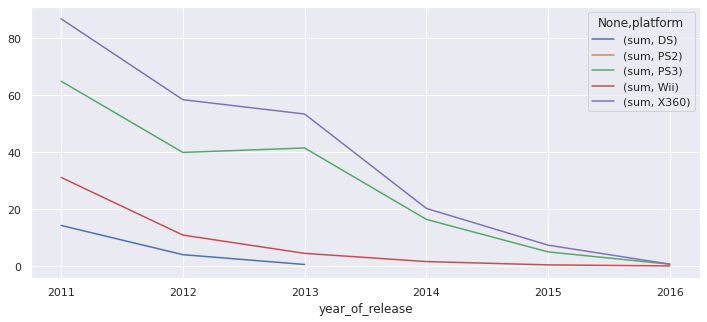

In [79]:
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='na_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

В Северной Америке несколько большей популярностью по сравнению с миром в целом пользовались платформы X360 и Wii. Ок 70% продаж игр на платформу X360 и околок 50% продаж игр Wii приходятся на Северную Америку. 

<AxesSubplot:xlabel='year_of_release'>

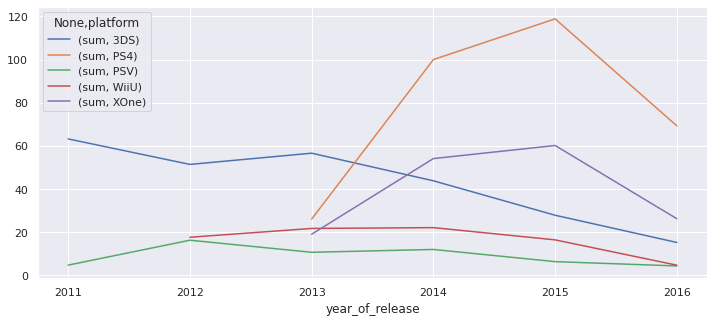

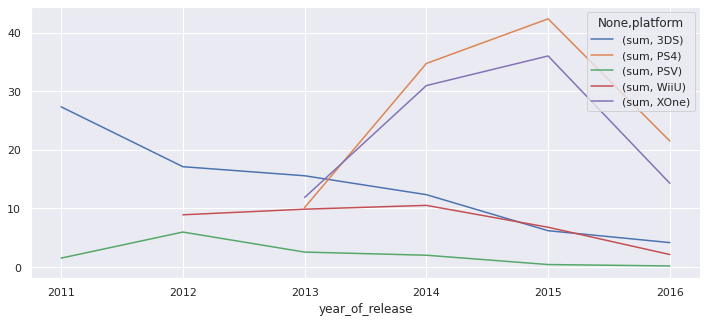

In [80]:
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='na_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Среди перспективных платформ в Северной Америке XOne может потягаться с PS4 судя по суммарным продажам. По миру в целом суммарные продажи игр на PS4 в разы превысили продажи на XOne. 

#### Жанры

In [81]:
# Топ жанров игр в Северной Америке
(
df.groupby('genre', as_index=False).agg({'na_sales': 'sum'})
    .sort_values(by='na_sales', ascending = False)
    .reset_index(drop=True)
    .head()
)

genre  na_sales
0        Action    230.92
1       Shooter    194.43
2        Sports    108.70
3  Role-Playing     83.78
4          Misc     69.69

<AxesSubplot:xlabel='year_of_release'>

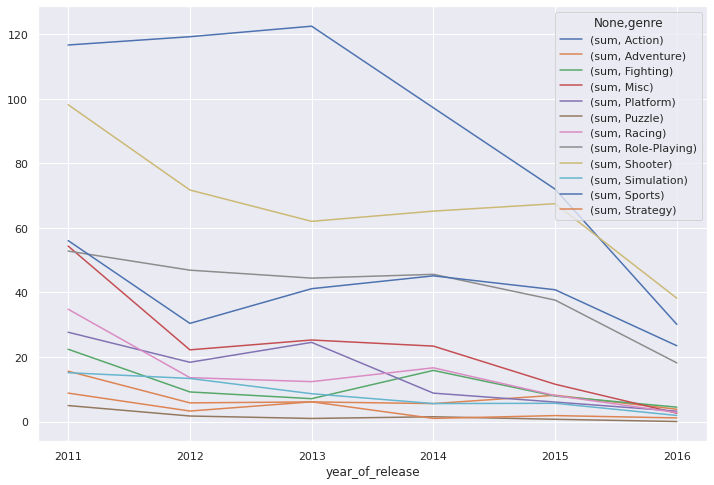

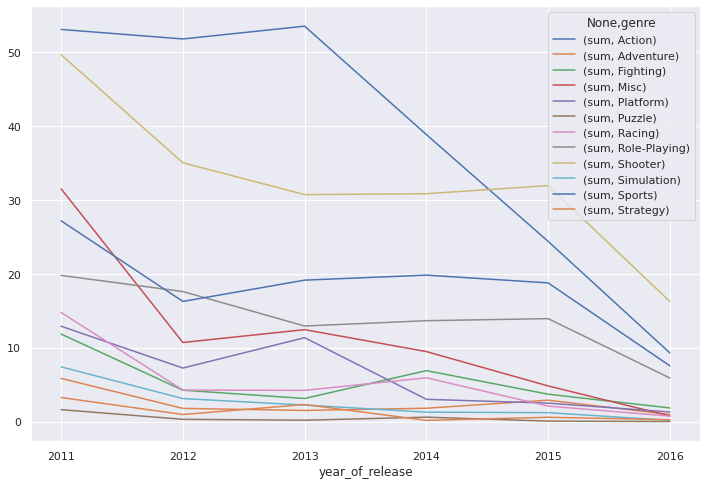

In [82]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='na_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)

<AxesSubplot:xlabel='year_of_release'>

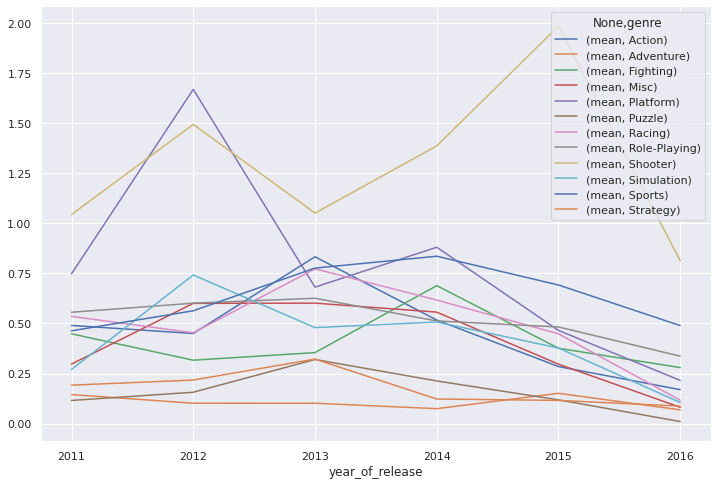

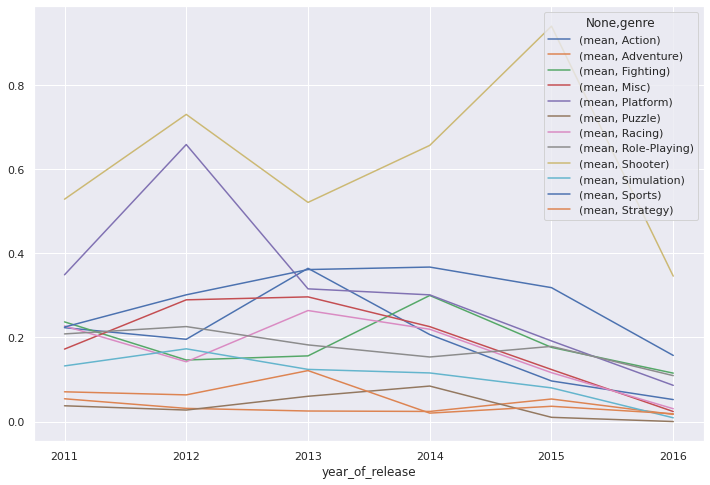

In [83]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='na_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)

Жанровых предпочтений Северной Америки, отличающих ее от мира в целом не выявлено.

#### ESRB и продажи

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

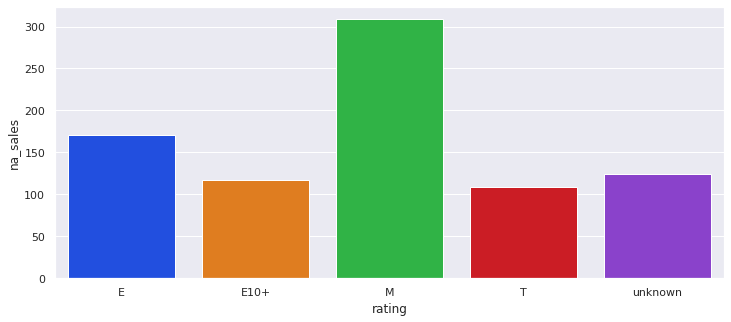

In [84]:
esbr = df.groupby(['rating'], as_index=False).agg({'na_sales': 'sum'})
sns.barplot(
    x='rating', 
    y='na_sales', 
    data=esbr,
    palette='bright')

#### Портрет

Взрослый(M), чаще чем ребенок (E или E10+).
<br>
Доля игр без рейтингп примерно такая же, как доля игр с рейтингом Т.
<br>
Предпочитает платформу Xbox (реже PS3).
<br>
Предпочитает жанры Action, Shooter, Sports.
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в GTA , Assassin's Creed, Call of Duty, Battlefield.
<br>
<br>
Если ребенок, то вероятно играет(/ал) в Wii Sports/Fit, Just Dance, Mario, NBA, Madden.   



In [85]:
# бестселлеры для жанра A для платформы З в Сев Ам
df[(df['genre'] == 'Sports')&(df['platform'] == 'X360')].sort_values(by='na_sales', ascending = False).head(10)

name platform  year_of_release   genre  na_sales  \
473                    NBA 2K13     X360             2012  Sports      2.60   
507               Madden NFL 13     X360             2012  Sports      2.53   
558               Madden NFL 12     X360             2011  Sports      2.42   
583                    NBA 2K12     X360             2011  Sports      2.31   
612                    NBA 2K14     X360             2013  Sports      2.10   
724               Madden NFL 25     X360             2013  Sports      1.98   
829               Madden NFL 15     X360             2014  Sports      1.77   
681   Kinect Sports: Season Two     X360             2011  Sports      1.38   
1130                   NBA 2K15     X360             2014  Sports      1.35   
1872           NCAA Football 14     X360             2013  Sports      1.01   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
473       0.20      0.01         0.19          88.0         7.2      E   
507       0.15      0.00         0.17          81.0         5.8      E   
558       0.11      0.00         0.16          78.0         5.9      E   
583       0.14      0.01         0.16          90.0         7.7      E   
612       0.19      0.00         0.23          87.0         4.9      E   
724       0.06      0.00         0.19          80.0         5.6      E   
829       0.06      0.00         0.22           NaN         5.5      E   
681       0.72      0.02         0.22          66.0         6.5      E   
1130      0.11      0.00         0.17           NaN         3.0      E   
1872      0.00      0.00         0.08          77.0         5.8      E   

      total_sales  
473          3.00  
507          2.85  
558          2.69  
583          2.62  
612          2.52  
724          2.23  
829          2.05  
681          2.34  
1130         1.63  
1872         1.09

### Европа

#### Платформы

<AxesSubplot:ylabel='Мировой Топ-5 в Европе'>

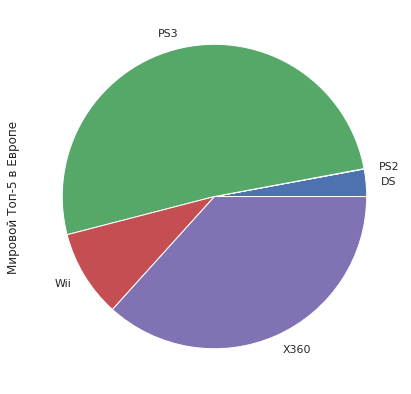

In [86]:
# доли в подвыборке наиболее популярных платформ в Европе (исключая все прочие платформы)
df_eu = df_top_pl.groupby('platform').agg({'eu_sales': 'sum'})
df_eu.plot(kind='pie', y='eu_sales', figsize=(7, 7), legend=False, 
           label='Мировой Топ-5 в Европе')

<AxesSubplot:ylabel='Локальный Топ-5 в Европе'>

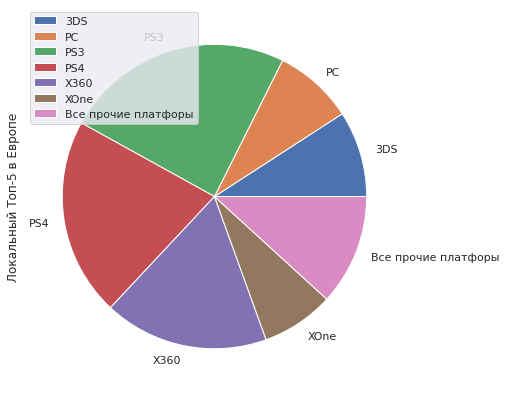

In [87]:
# доли самых популярных платформ среди всех платформ за весь период с 2000 г.
df_eu2 = df.groupby('platform', as_index=False).agg({'eu_sales': 'sum'})

df_eu2['platform'] = df_eu2.where(df_eu2['eu_sales'] >= 43, 'Все прочие платфоры')
df_eu2 = df_eu2.groupby('platform').agg({'eu_sales': 'sum'})
df_eu2.plot(kind='pie', y='eu_sales', figsize=(7, 7), legend=True, 
            label='Локальный Топ-5 в Европе')

<AxesSubplot:xlabel='year_of_release'>

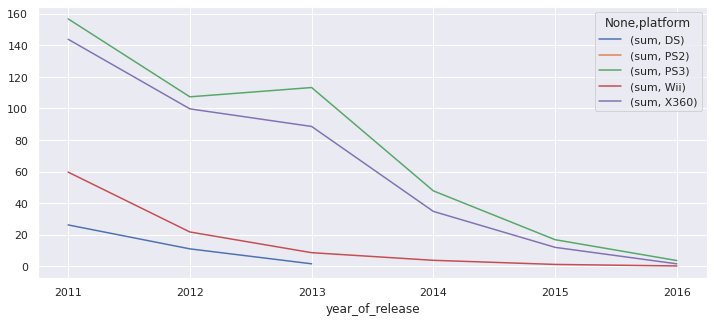

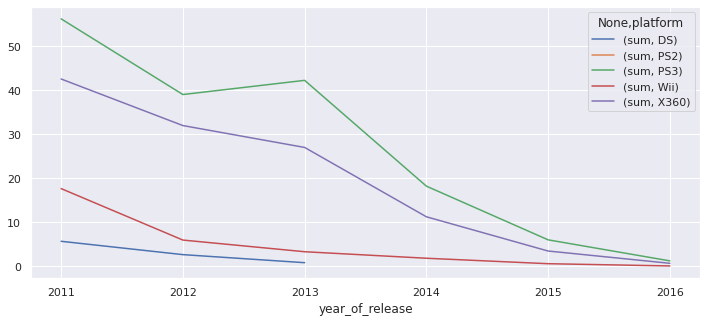

In [88]:
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='eu_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Европа предпочитала PS3. Продажи игр на PS3 в Европе опередили продажи на X360, в отличие от мира в целом (где они равны). Продажи PS3 в европе составляют чуть больше 1/3 от мировых. Продажи игр на Wii в Европе ниже, чем по миру и примерно равны продажам PS2. Пик продаж игр на DS в Европе пришелся на 2005 г., т.е. равньше чем по миру в целом (пик в 2007 г.). Доля продаж игр на DS в Европе сравнительно низкая, доля PS4 успела ее превысить (в локальный европейский Топ-5 платформ DS не вошла).

<AxesSubplot:xlabel='year_of_release'>

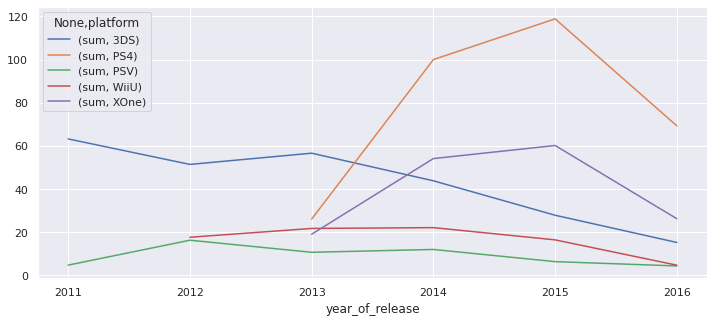

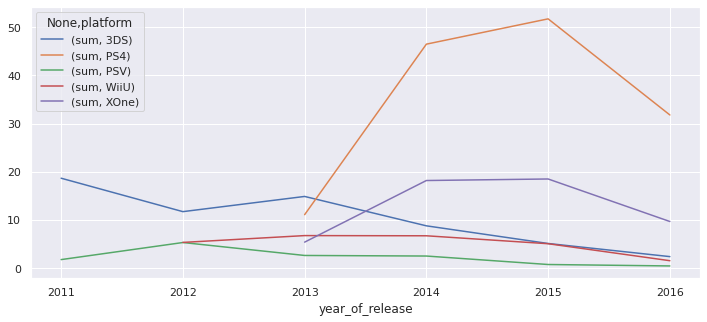

In [89]:
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='eu_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Из перспективных платформ в Европе плохи дела у 3DS по сравнению с миром в целом. Значит у игр платформ конкурентов 3DS  есть шанс в Европе. 

#### Жанры

In [90]:
# Топ жанров игр в Европе
(
df.groupby('genre', as_index=False).agg({'eu_sales': 'sum'})
    .sort_values(by='eu_sales', ascending = False)
    .reset_index(drop=True)
    .head()
)

genre  eu_sales
0        Action    199.12
1       Shooter    148.02
2        Sports     88.48
3  Role-Playing     62.30
4        Racing     40.58

<AxesSubplot:xlabel='year_of_release'>

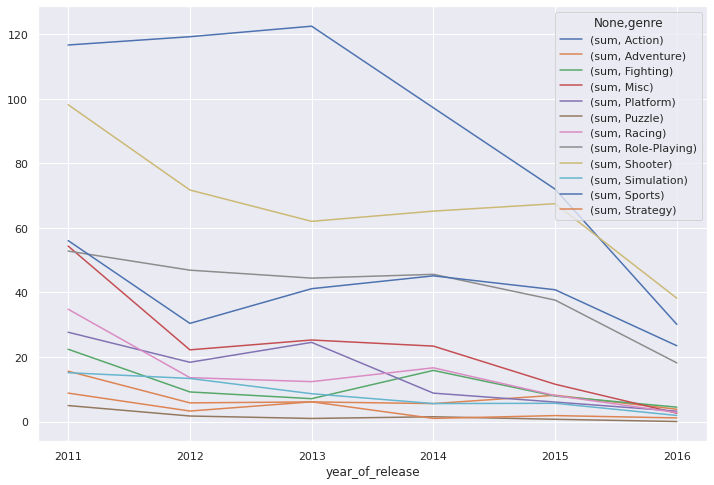

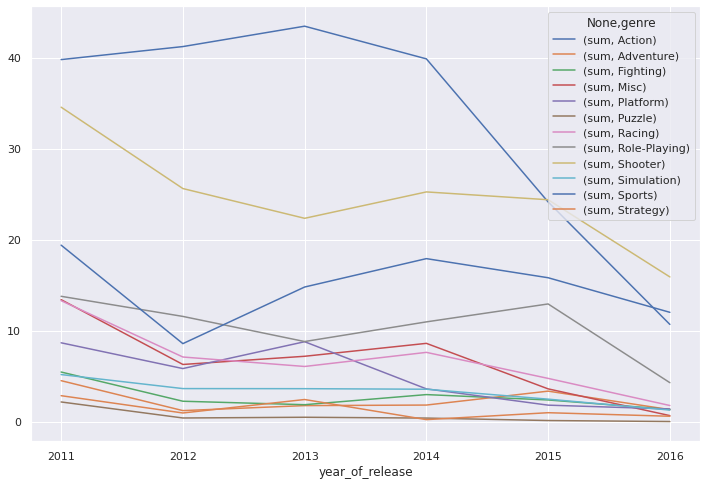

In [91]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='eu_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)

В Европе меньшей популярность популярностью пользуются Role-Plaing и Misc, чем в мире в целом и несколько большей Shooter и Racing. По средним продажам это также видно.  

<AxesSubplot:xlabel='year_of_release'>

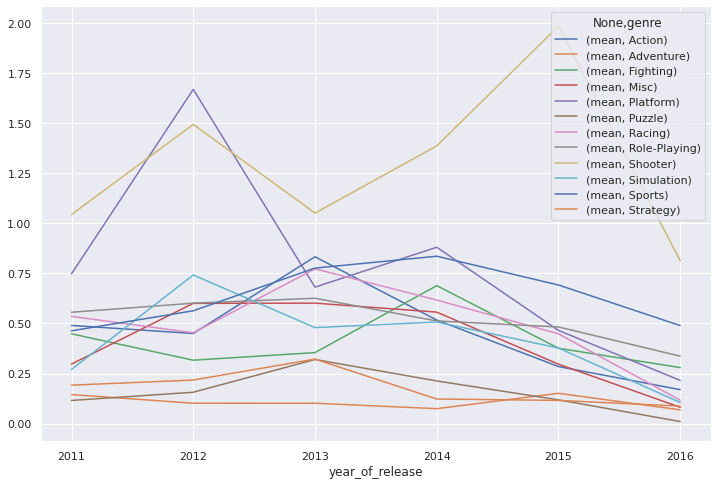

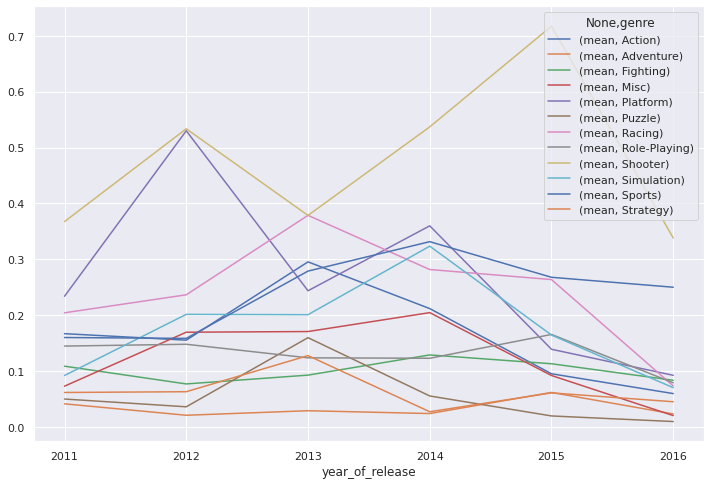

In [92]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='eu_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)

#### ESRB и продажи

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

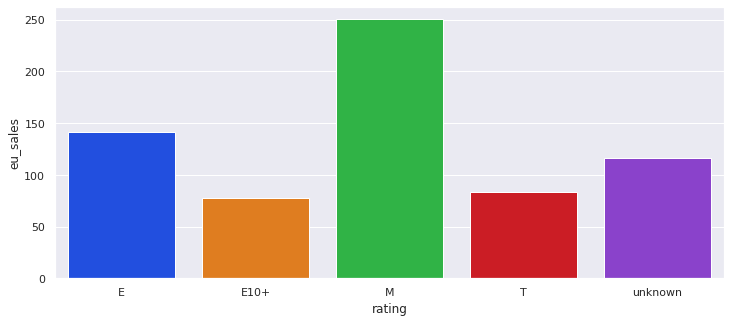

In [93]:
esbr = df.groupby(['rating'], as_index=False).agg({'eu_sales': 'sum'})
sns.barplot(
    x='rating', 
    y='eu_sales', 
    data=esbr,
    palette='bright')

Суммарные продажи игр для взрослых в Европе не многим отстают от суммарных продаж игр для детей. Суммарные проажи игр для подростков немногим отстают от продаж игр для взрослых. 

#### Портрет

Взрослый(M), чаще чем ребенок (E или E10+).
<br>
Предпочитает платформу PS3 или PS4.
<br>
Предпочитает жанры Action, Sports, Shooter. (Shooter и Racing несколько больше, чем в мире в целом, единственный регион, где Racing в ТОП-5).
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в GTA, FIFA, Assassin's Creed, Call of Duty, Battlefield.
<br>
<br>
Если ребенок, то вероятно играет(/ал) в Gran Turismo, Need for Speed, Wii Sports/Fit, FIFA, Mario.

In [94]:
df[(df['genre'] == 'Sports') & ((df['platform'] == 'PS3') | (df['platform'] == 'X360'))].sort_values(by='eu_sales', ascending = False).head(10)

name platform  year_of_release   genre  na_sales  \
122                     FIFA 12      PS3             2011  Sports      0.84   
126                     FIFA 14      PS3             2013  Sports      0.78   
264                     FIFA 15      PS3             2014  Sports      0.58   
271                     FIFA 14     X360             2013  Sports      0.92   
278                     FIFA 12     X360             2011  Sports      0.84   
494                     FIFA 15     X360             2014  Sports      0.79   
552                     FIFA 16      PS3             2015  Sports      0.41   
1613                FIFA Street      PS3             2012  Sports      0.12   
1182                    FIFA 16     X360             2015  Sports      0.57   
681   Kinect Sports: Season Two     X360             2011  Sports      1.38   

      eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
122       4.30      0.11         1.39           NaN         NaN  unknown   
126       4.24      0.07         1.37          86.0         4.3        E   
264       3.02      0.04         0.64           NaN         4.5        E   
271       2.89      0.01         0.40          84.0         4.2        E   
278       2.78      0.02         0.53           NaN         NaN  unknown   
494       1.92      0.00         0.21           NaN         4.2        E   
552       1.84      0.05         0.40           NaN         3.2        E   
1613      0.89      0.00         0.23          76.0         6.4        E   
1182      0.88      0.00         0.12           NaN         2.9        E   
681       0.72      0.02         0.22          66.0         6.5        E   

      total_sales  
122          6.64  
126          6.46  
264          4.28  
271          4.22  
278          4.17  
494          2.92  
552          2.70  
1613         1.24  
1182         1.57  
681          2.34

### Япония

#### Платформы

<AxesSubplot:ylabel='Мировой Топ-5 в Японии'>

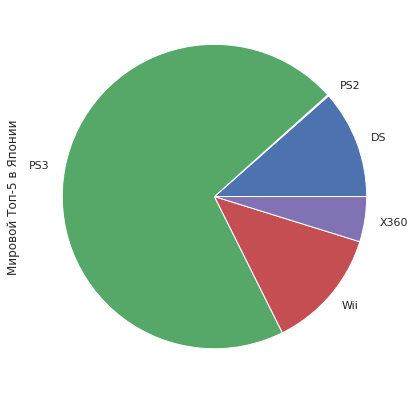

In [95]:
# доли в подвыборке наиболее популярных платформ в Японии (исключая все прочие платформы)
df_jp = df_top_pl.groupby('platform').agg({'jp_sales': 'sum'})
df_jp.plot(kind='pie', y='jp_sales', figsize=(7, 7), legend=False, 
           label='Мировой Топ-5 в Японии')

<AxesSubplot:ylabel='jp_sales'>

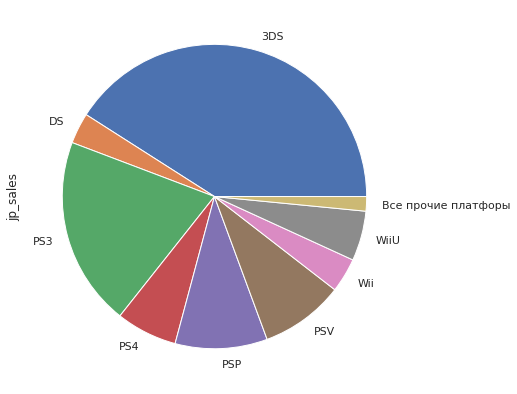

In [96]:
# доли самых популярных платформ среди всех платформ за весь период с 2000 г.
df_jp2 = df.groupby('platform', as_index=False).agg({'jp_sales': 'sum'})
df_jp2['platform'] = df_jp2.where(df_jp2['jp_sales'] >= 8, 'Все прочие платфоры')
df_jp2 = df_jp2.groupby('platform').agg({'jp_sales': 'sum'})
df_jp2.plot(kind='pie', y='jp_sales', figsize=(7, 7), legend=False, 
            label='jp_sales')

<AxesSubplot:xlabel='year_of_release'>

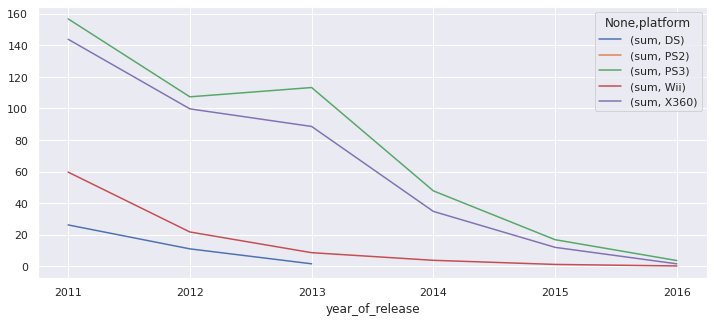

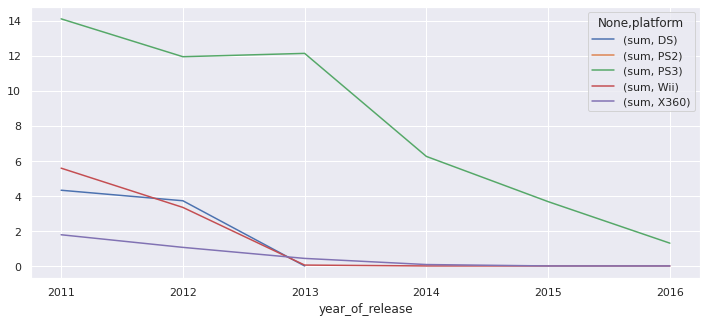

In [97]:
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_top_pl.pivot_table(index=['year_of_release'], columns='platform', values='jp_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Предпочтения к игромым платформам в Японии сильнее отличаются от мира в целом по сравнению Северной Америкой и Европой:
<br><br>
Во-первых, X360 практически не пользовалось популярностью в Японии (в локальном Топ-5 ее нет).
<br><br>
Во-вторых, максимальные продажи игр кадого следующего поколение платформы PS были ниже, чем у предыдущее (если смотреть с 2000 г.). 
<br><br>
В-третьих, самой популярной и показывшей наибольшей максимум продаж в 2006 г. стала платформа DS. Если с 2011 г. - 3DS.
<br><br>
В-четвертых, в Японии провалились очень много игр разных платформ (в медианах много 0).
<br><br>
В-пятых, продажи игр на 3DS в локальном Топ-5 в Японии и больше продаж игра на PS4 (PS4 в Японии намного менее успешна, чем в Европе). 
<br><br>
***Таким образом, Япония представляет собой интересную модель для мира в отношении видеоигр: один "Вау-эффект" PS2 в 2003 - 2004, а затем переход к портативным игровым консолям соответствует прекращению роста выпука игр после 2010 в мире***


In [98]:
df.pivot_table(index='platform', values='jp_sales', aggfunc=['sum','mean','median','max','min'])

sum      mean   median      max      min
         jp_sales  jp_sales jp_sales jp_sales jp_sales
platform                                              
3DS        100.62  0.196523     0.05     4.39      0.0
DS           8.04  0.043696     0.00     3.14      0.0
PC           0.00  0.000000     0.00     0.00      0.0
PS2          0.09  0.012857     0.00     0.06      0.0
PS3         49.39  0.069760     0.02     0.98      0.0
PS4         15.96  0.040714     0.01     0.49      0.0
PSP         24.04  0.077051     0.04     0.81      0.0
PSV         21.84  0.050909     0.03     0.90      0.0
Wii          8.97  0.045533     0.00     0.96      0.0
WiiU        13.01  0.088503     0.00     1.46      0.0
X360         3.35  0.006727     0.00     0.13      0.0
XOne         0.34  0.001377     0.00     0.04      0.0

<AxesSubplot:xlabel='year_of_release'>

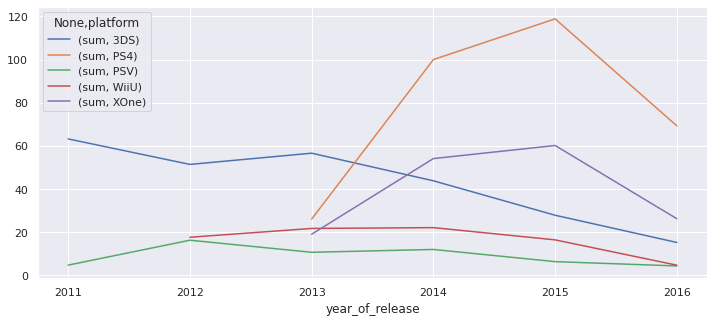

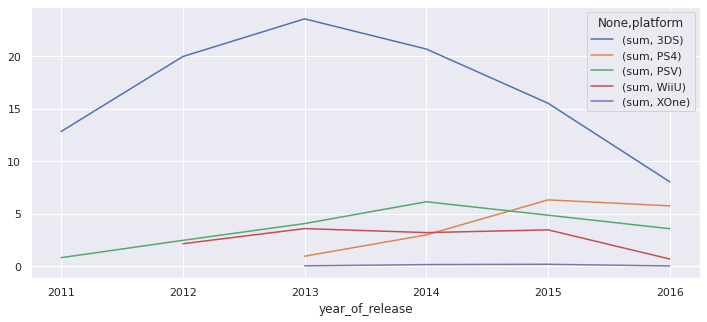

In [99]:
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)
(
df_future.pivot_table(index=['year_of_release'], columns='platform', values='jp_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 5))
)

Среди перспективных платформ в Японии выделяются портативные игровые платформы - 3DS, PS4, PSV. 

#### Жанры

In [100]:
# Топ жанров игр в Японии
(
df.groupby('genre', as_index=False).agg({'jp_sales': 'sum'})
    .sort_values(by='jp_sales', ascending = False)
    .reset_index(drop=True)
    .head()
)

genre  jp_sales
0  Role-Playing     79.87
1        Action     63.62
2          Misc     17.60
3      Fighting     12.38
4      Platform     12.13

<AxesSubplot:xlabel='year_of_release'>

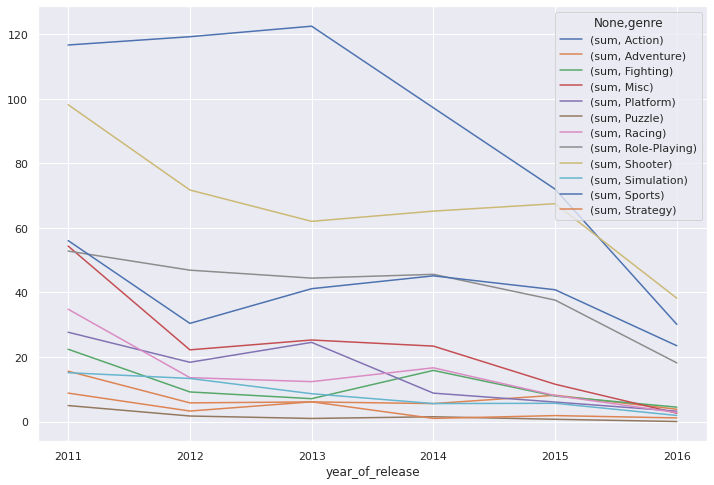

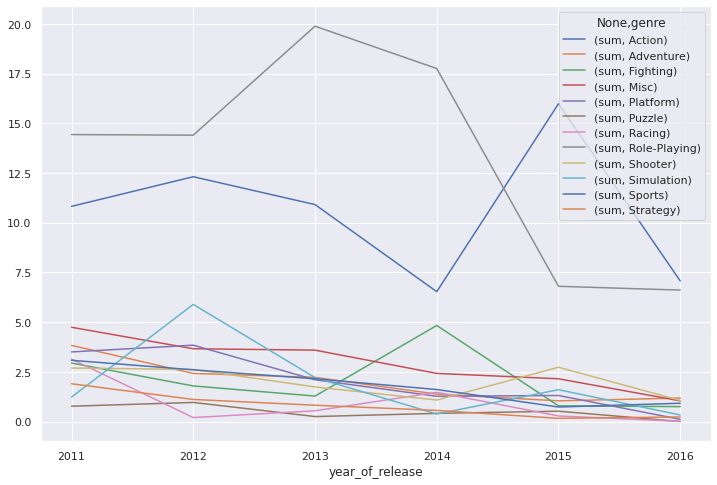

In [101]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='jp_sales', aggfunc=['sum'])
.plot(grid=True, figsize=(12, 8))
)

<AxesSubplot:xlabel='year_of_release'>

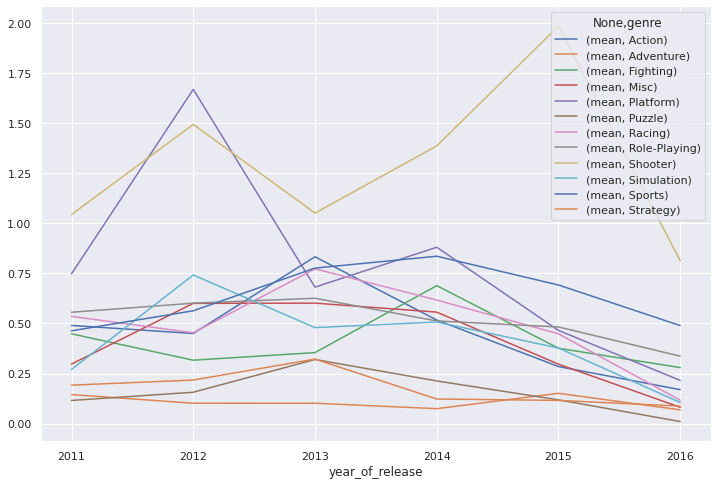

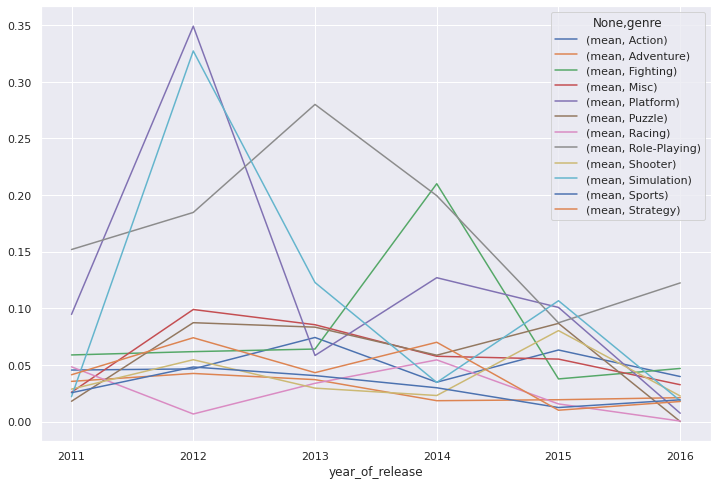

In [102]:
(
df.pivot_table(index=['year_of_release'], columns='genre', values='total_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)
(
df.pivot_table(index=['year_of_release'], columns='genre', values='jp_sales', aggfunc=['mean'])
.plot(grid=True, figsize=(12, 8))
)

Жанровые предпочтения Японии также отличаются от мировых сильнее, чем предпочтения Европы:
<br><br>
Во-первых, в Японии намного более популярены игры жанра Role-Playing (это самый популярны жанр, популярнее Action - самого популярного жанра в мире и второго по популярности в Японии).
<br><br>
Во-вторых, в Японии намного менее популярены игры жанра Shooter (это наименее популярный жанр в Японии. Даже Fiting в Японии популярнее Shooter. Fighting в Японии популярнее Shooter и входит в Топ 5 жанров. (Вероятно Shooter, которые хорошо продавались в Северной Америке и Европе потерпети фиаско в Японии).
<br><br>
В-третьих, в Японии игры жанра Simulation и Puzzle заметно популярнее мира в целом.
<br><br>
***По всей очевидности в Японии список игр-бестселлеров заметно отличется от этого списка в Северной Америке и Европе***
<br><br>
**Игры серии GTA бестселлер жанра Action в Северной Америке и Европе не стал бестселлером в Японии(где в жанре Action бестселлеры Pokemon на DS и Monster Hunter X на 3DS)***
<br><br>
Среди бестселлеров жанра Paltform в Японии как и в остальном мире игра про Марио DS и Wii.
<br><br>
Среди бестселлеров жанра Role-Playing в Японии Pokemon на DS и Monster Hunter на PSP.
<br><br>
В Японии в отличие от остального мира есть бестселлеры в жанре Simulation - игры серии Animal Crossing для DS B DS3 и в жанре Puzzle - Brain Age 2: More Training in Minutes a Day для DS. 

In [103]:
df.pivot_table(index='genre', values='jp_sales', aggfunc=['sum','mean','median','max','min'])

sum      mean   median      max      min
             jp_sales  jp_sales jp_sales jp_sales jp_sales
genre                                                     
Action          63.62  0.050134     0.01     2.79      0.0
Adventure       12.07  0.029439     0.02     0.62      0.0
Fighting        12.38  0.077862     0.03     2.43      0.0
Misc            17.60  0.046933     0.00     0.90      0.0
Platform        12.13  0.099426     0.00     2.47      0.0
Puzzle           2.91  0.040986     0.00     0.66      0.0
Racing           5.64  0.031333     0.00     2.69      0.0
Role-Playing    79.87  0.171763     0.06     4.35      0.0
Shooter         11.92  0.036231     0.00     1.46      0.0
Simulation      11.64  0.085588     0.00     4.39      0.0
Sports          11.09  0.028509     0.00     0.49      0.0
Strategy         4.78  0.040855     0.00     0.42      0.0

In [104]:
# бестселлеры для жанра Action в Японии
df[df['genre'] == 'Action'].sort_values(by='jp_sales', ascending = False).head(20)

name platform  \
406                                    Monster Hunter X      3DS   
694                                 Yokai Watch Busters      3DS   
1466                                      Yokai Watch 3      3DS   
235                          Luigi's Mansion: Dark Moon      3DS   
16                                   Grand Theft Auto V      PS3   
2387                                 Monster Strike 3DS      3DS   
1716                         One Piece: Pirate Warriors      PS3   
259                The Legend of Zelda: Ocarina of Time      3DS   
3393                                           Yakuza 5      PS3   
3257                                  Warriors Orochi 3      PS3   
3593                                   Yokai Sangokushi      3DS   
750                           Pro Evolution Soccer 2012      PS3   
2168                          Pro Evolution Soccer 2014      PS3   
390                Metal Gear Solid V: The Phantom Pain      PS4   
4016  Dragon Quest Heroes: The World's Tree Woe and ...      PS3   
677               The Legend of Zelda: Majora's Mask 3D      3DS   
2219                              Kirby: Planet Robobot      3DS   
448          The Legend of Zelda: A Link Between Worlds      3DS   
2279                                 Dynasty Warriors 7      PS3   
1358                     Metal Gear Rising: Revengeance      PS3   

      year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  \
406              2015  Action      0.27      0.21      2.79         0.05   
694              2015  Action      0.00      0.00      2.29         0.00   
1466             2016  Action      0.00      0.00      1.33         0.00   
235              2013  Action      1.80      1.39      1.11         0.29   
16               2013  Action      7.02      9.09      0.98         3.96   
2387             2015  Action      0.00      0.00      0.87         0.00   
1716             2012  Action      0.01      0.23      0.86         0.08   
259              2011  Action      2.09      1.31      0.62         0.31   
3393             2012  Action      0.00      0.00      0.59         0.00   
3257             2011  Action      0.00      0.04      0.57         0.01   
3593             2016  Action      0.00      0.00      0.56         0.00   
750              2011  Action      0.34      0.96      0.55         0.33   
2168             2013  Action      0.03      0.41      0.51         0.00   
390              2015  Action      1.09      1.36      0.49         0.48   
4016             2015  Action      0.00      0.00      0.49         0.00   
677              2015  Action      1.15      0.55      0.47         0.17   
2219             2016  Action      0.28      0.14      0.47         0.04   
448              2013  Action      1.40      1.01      0.46         0.23   
2279             2011  Action      0.25      0.13      0.46         0.06   
1358             2013  Action      0.45      0.37      0.44         0.16   

      critic_score  user_score   rating  total_sales  
406            NaN         NaN  unknown         3.32  
694            NaN         NaN  unknown         2.29  
1466           NaN         NaN  unknown         1.33  
235           86.0         8.4        E         4.59  
16            97.0         8.2        M        21.05  
2387           NaN         NaN  unknown         0.87  
1716          64.0         6.5        T         1.18  
259            NaN         NaN  unknown         4.33  
3393          83.0         8.5        M         0.59  
3257          70.0         7.9        T         0.62  
3593           NaN         NaN  unknown         0.56  
750           80.0         6.6        E         2.18  
2168          78.0         4.1        E         0.95  
390           93.0         8.2        M         3.42  
4016           NaN         NaN  unknown         0.49  
677           89.0         9.0     E10+         2.34  
2219          81.0         8.7        E         0.93  
448           91.0         8.9     

In [105]:
# бестселлеры для жанра Platform в Японии
df[df['genre'] == 'Platform'].sort_values(by='jp_sales', ascending = False).head(10)

name platform  year_of_release     genre  \
62        New Super Mario Bros. 2      3DS             2012  Platform   
53            Super Mario 3D Land      3DS             2011  Platform   
185       New Super Mario Bros. U     WiiU             2012  Platform   
424             Super Mario Maker     WiiU             2015  Platform   
952          Kirby: Triple Deluxe      3DS             2014  Platform   
1109  Kirby's Return to Dreamland      Wii             2011  Platform   
260          Super Mario 3D World     WiiU             2013  Platform   
1028                        Knack      PS4             2013  Platform   
2081           Kirby: Mass Attack       DS             2011  Platform   
912   Donkey Kong Country Returns      3DS             2013  Platform   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
62        3.66      3.14      2.47         0.63          78.0         7.2   
53        4.89      3.00      2.14         0.78          90.0         8.4   
185       2.30      1.34      1.27         0.32          84.0         8.1   
424       1.18      0.89      0.94         0.20          88.0         8.7   
952       0.61      0.34      0.79         0.09          80.0         8.8   
1109      0.58      0.21      0.79         0.07          77.0         8.5   
260       2.11      1.16      0.73         0.32          93.0         9.0   
1028      0.43      0.68      0.42         0.20          54.0         6.5   
2081      0.48      0.06      0.41         0.05          83.0         8.6   
912       0.74      0.62      0.41         0.13           NaN         NaN   

       rating  total_sales  
62          E         9.90  
53          E        10.81  
185         E         5.23  
424         E         3.21  
952         E         1.83  
1109     E10+         1.65  
260         E         4.32  
1028     E10+         1.73  
2081        E         1.00  
912   unknown         1.90

In [106]:
# бестселлеры для жанра Platform в Японии
df[df['genre'] == 'Role-Playing'].sort_values(by='jp_sales', ascending = False).head(10)

name platform  year_of_release  \
33                          Pokemon X/Pokemon Y      3DS             2013   
385                            Monster Hunter 4      3DS             2013   
412                   Yokai Watch 2 Ganso/Honke      3DS             2014   
83              Pokemon Black 2/Pokemon White 2       DS             2012   
47    Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
563                      Yokai Watch 2 Shinuchi      3DS             2014   
312                   Monster Hunter 4 Ultimate      3DS             2014   
108                            Pokemon Sun/Moon      3DS             2016   
532                          Monster Hunter Tri      3DS             2011   
1244                           Puzzle & Dragons      3DS             2013   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
33    Role-Playing      5.28      4.19      4.35         0.78           NaN   
385   Role-Playing      0.00      0.00      3.44         0.00           NaN   
412   Role-Playing      0.09      0.00      3.18         0.01           NaN   
83    Role-Playing      2.79      1.72      3.14         0.41           NaN   
47    Role-Playing      4.35      3.49      3.10         0.74           NaN   
563   Role-Playing      0.00      0.00      2.68         0.00           NaN   
312   Role-Playing      0.68      0.48      2.62         0.11          86.0   
108   Role-Playing      2.98      1.45      2.26         0.45           NaN   
532   Role-Playing      0.46      0.29      1.96         0.07           NaN   
1244  Role-Playing      0.00      0.00      1.51         0.00           NaN   

      user_score   rating  total_sales  
33           NaN  unknown        14.60  
385          NaN  unknown         3.44  
412          NaN  unknown         3.28  
83           NaN  unknown         8.06  
47           NaN  unknown        11.68  
563          NaN  unknown         2.68  
312          8.7        T         3.89  
108          NaN  unknown         7.14  
532          NaN  unknown         2.78  
1244         NaN  unknown         1.51

In [107]:
# бестселлеры для жанра Simulation в Японии
df[df['genre'] == 'Simulation'].sort_values(by='jp_sales', ascending = False).head(10)

name platform  \
73                            Animal Crossing: New Leaf      3DS   
184                                      Tomodachi Life      3DS   
457                Animal Crossing: Happy Home Designer      3DS   
318                                   Nintendogs + cats      3DS   
2799                          Style Savvy: Trendsetters      3DS   
4618                                   Story of Seasons      3DS   
4877                                     Armored Core V      PS3   
7324                    Magician's Quest: Town of Magic      3DS   
7558  Story of Seasons: Good Friends of the Three Vi...      3DS   
7762                                      New Love Plus      3DS   

      year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
73               2012  Simulation      2.03      2.36      4.39         0.39   
184              2013  Simulation      0.97      2.11      1.90         0.24   
457              2015  Simulation      0.51      1.02      1.40         0.12   
318              2011  Simulation      1.44      1.41      0.73         0.27   
2799             2012  Simulation      0.16      0.02      0.53         0.01   
4618             2014  Simulation      0.00      0.14      0.27         0.01   
4877             2012  Simulation      0.09      0.04      0.24         0.02   
7324             2012  Simulation      0.00      0.00      0.21         0.00   
7558             2016  Simulation      0.00      0.00      0.20         0.00   
7762             2012  Simulation      0.00      0.00      0.19         0.00   

      critic_score  user_score   rating  total_sales  
73            88.0         8.7        E         9.17  
184            NaN         NaN  unknown         5.22  
457           66.0         6.9        E         3.05  
318            NaN         NaN  unknown         3.85  
2799          76.0         8.0        E         0.72  
4618          76.0         8.2     E10+         0.42  
4877          65.0         7.3        T         0.39  
7324           NaN         NaN  unknown         0.21  
7558           NaN         NaN  unknown         0.20  
7762           NaN         NaN  unknown         0.19

In [108]:
# бестселлеры для жанра Puzzle в Японии
df[df['genre'] == 'Puzzle'].sort_values(by='jp_sales', ascending = False).head(10)

name platform  \
3055                                Puzzler Brain Games      Wii   
980            Professor Layton and the Mask of Miracle      3DS   
4072     Puzzle & Dragons Z + Super Mario Bros. Edition      3DS   
2560   Professor Layton vs Phoenix Wright: Ace Attorney      3DS   
2714              Professor Layton and the Azran Legacy      3DS   
1691                     Captain Toad: Treasure Tracker     WiiU   
9239                       Puyo Puyo!! 20th Anniversary       DS   
9530                       Puyo Puyo!! 20th Anniversary      3DS   
10060                                  Puyo Puyo Tetris      3DS   
10278                                      Picross 3D 2      3DS   

       year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  \
3055              2012  Puzzle      0.00      0.00      0.66         0.00   
980               2011  Puzzle      0.32      0.97      0.36         0.13   
4072              2015  Puzzle      0.06      0.07      0.34         0.01   
2560              2012  Puzzle      0.20      0.26      0.30         0.04   
2714              2013  Puzzle      0.00      0.48      0.25         0.03   
1691              2014  Puzzle      0.53      0.38      0.19         0.09   
9239              2011  Puzzle      0.00      0.00      0.14         0.00   
9530              2011  Puzzle      0.00      0.00      0.13         0.00   
10060             2014  Puzzle      0.00      0.00      0.11         0.00   
10278             2015  Puzzle      0.00      0.00      0.11         0.00   

       critic_score  user_score   rating  total_sales  
3055            NaN         NaN  unknown         0.66  
980             NaN         NaN  unknown         1.78  
4072            NaN         NaN  unknown         0.48  
2560           79.0         8.5        T         0.80  
2714           81.0         7.9     E10+         0.76  
1691           81.0         8.6        E         1.19  
9239            NaN         NaN  unknown         0.14  
9530            NaN         NaN  unknown         0.13  
10060           NaN         NaN  unknown         0.11  
10278           NaN         NaN  unknown         0.11

#### ESRB и продажи

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

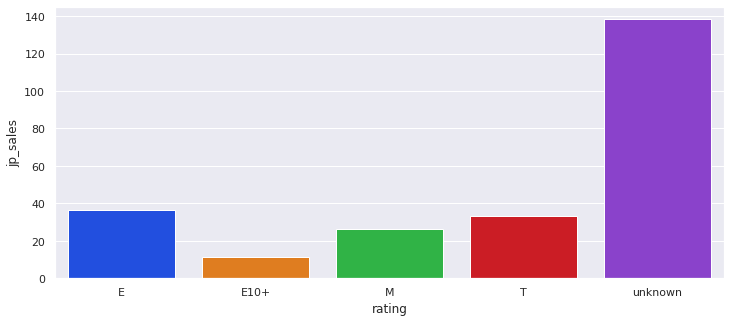

In [109]:
esbr = df.groupby(['rating'], as_index=False).agg({'jp_sales': 'sum'})
sns.barplot(
    x='rating', 
    y='jp_sales', 
    data=esbr,
    palette='bright')

В Японии больше прочих продаются игры с рейтингом E - для детей и T - для подростков.

#### Портрет

Неизвестно дети(E или E10+), взрослые(M) или подростки(T) в Японии больше играют в видеоигры, т.к. в подавляющем большинстве преобладают игры с неопределенным жанром. Япония не слишком следует требованиям ESRB.
<br>
Предпочитает платформу 3DS или PS3.
<br>
Предпочитает жанры Role-Playing, Action, Platform. (Shooter и Racing в ТОП-5 отсутствуют).
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в Final Fantas, GTA, Dynasty Warriors, Mobile Suit Gundam.
<br>
<br>
Если ребенок, то вероятно играет(/ал) в Pokemon, Animal Crossing, Tamagotchi, Dragon Quest, Pro Evolution Soccer, Mario (на DS), Brain/English Training.

In [110]:
df[(df['genre'] == 'Platform')&((df['platform'] == '3DS')|(df['platform'] == 'PS3'))].sort_values(by='jp_sales', ascending = False).head(10)                                    

name platform  year_of_release     genre  \
62        New Super Mario Bros. 2      3DS             2012  Platform   
53            Super Mario 3D Land      3DS             2011  Platform   
952          Kirby: Triple Deluxe      3DS             2014  Platform   
912   Donkey Kong Country Returns      3DS             2013  Platform   
1395           Yoshi's New Island      3DS             2014  Platform   
4025             Sonic Lost World      3DS             2013  Platform   
1290         LEGO City Undercover      3DS             2013  Platform   
6825         Chibi-Robo! Zip Lash      3DS             2015  Platform   
394             LittleBigPlanet 2      PS3             2011  Platform   
1797   Ratchet & Clank: All 4 One      PS3             2011  Platform   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
62        3.66      3.14      2.47         0.63          78.0         7.2   
53        4.89      3.00      2.14         0.78          90.0         8.4   
952       0.61      0.34      0.79         0.09          80.0         8.8   
912       0.74      0.62      0.41         0.13           NaN         NaN   
1395      0.48      0.53      0.28         0.09          64.0         6.1   
4025      0.24      0.14      0.07         0.03          59.0         6.5   
1290      0.52      0.77      0.07         0.11           NaN         NaN   
6825      0.09      0.08      0.06         0.02           NaN         NaN   
394       1.83      1.05      0.06         0.46          91.0         8.4   
1797      0.75      0.21      0.05         0.12           NaN         NaN   

       rating  total_sales  
62          E         9.90  
53          E        10.81  
952         E         1.83  
912   unknown         1.90  
1395        E         1.38  
4025     E10+         0.48  
1290  unknown         1.47  
6825  unknown         0.25  
394         E         3.40  
1797  unknown         1.13

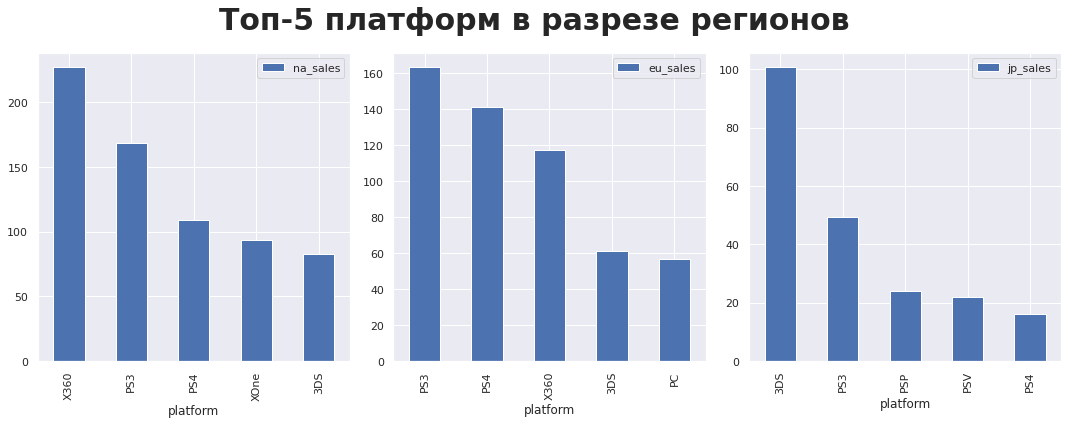

In [118]:

# Создаю свой датасет
data_my = pd.read_csv('/datasets/games.csv')
data_my.columns = map(str.lower, data_my.columns)
data_my = data_my.dropna(subset = ['year_of_release', 'name', 'genre'])
data_my['rating'] = data_my['rating'].fillna('unknown')
data_my['total_sales'] = data_my[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data_my = data_my[data_my['year_of_release'] >= 2011]



# А теперь мы можем в каждую ячейку поместить свой график либо вручную либо в цикле. Лучше конечно в цикле:

# Задаем subplots: 1 строка 3 столбца
fig, ax = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Топ-5 платформ в разрезе регионов', fontsize = 30, fontweight='bold')


for i, region in enumerate(['na_sales','eu_sales','jp_sales']):
#     ax = ax[i] так помещают каждый график в отдельную ячейку
    (data_my.pivot_table(index='platform', 
                                   values=region, 
                                   aggfunc='sum').nlargest(5, region)).plot(kind = 'bar', ax = ax[i])
# Чтобы всё корректно поместилось
    plt.tight_layout()
    
    
    
#  Можно строить техничней и интереснее, но мне кажется так понятней 


## Проверка гипотез

### Гипотеза о равенстве средних пользовательских ретингов  Xbox One и PC

H0: средние оценки игроков платформы XOne и PC ранвы
<br>
H1: средние оценки игроков платформы XOne и PC не равны

In [111]:
# Оставим в df только те игры, для которых есть оценки игроков
df = df.dropna(subset=['user_score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 16 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2032 non-null   object 
 1   platform         2032 non-null   object 
 2   year_of_release  2032 non-null   int64  
 3   genre            2032 non-null   object 
 4   na_sales         2032 non-null   float64
 5   eu_sales         2032 non-null   float64
 6   jp_sales         2032 non-null   float64
 7   other_sales      2032 non-null   float64
 8   critic_score     1763 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           2032 non-null   object 
 11  total_sales      2032 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 206.4+ KB


In [112]:
print(df[df['platform'] == 'XOne']['user_score'].shape[0], 'оценок игр пользователей XOne')
print(df[df['platform'] == 'PC']['user_score'].shape[0], 'оценок игр пользователей PC')
print('средняя оценка игр пользователей XOne', df[df['platform'] == 'XOne']['user_score'].mean())
print('средняя оценка игр пользователей PC', df[df['platform'] == 'PC']['user_score'].mean())

182 оценок игр пользователей XOne
307 оценок игр пользователей PC
средняя оценка игр пользователей XOne 6.521428571428572
средняя оценка игр пользователей PC 6.451791530944625


Для проверки гипотезы используем T-тест для сравнения средних двух генеральных совокупностей, т.к. пользователи XOne и PC в целом - две генеральные совокупности. Нет оснований полагать, что дисперсии у этих двух генеральных совокупностей одинаковы. 

In [113]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df[df['platform'] == 'XOne']['user_score'],
    df[df['platform'] == 'PC']['user_score'],
    equal_var = False)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


**Гипотеза о равенстве средних пользовательских ретингов Xbox One и PC не отвергается. Средние оценки пользователей могут быть равны.**

### Гипотеза о равенстве средних пользовательских ретингов жанрова Action и Sports

H0: средние оценки игроков жанра Action и жанра Sports равны
<br>
H1: средние оценки игроков жанра Action и жанра Sports не равны

In [114]:
print(df[df['genre'] == 'Action']['user_score'].shape[0], 'оценок игроков жанра Action')
print(df[df['genre'] == 'Sports']['user_score'].shape[0], 'оценок игроков жанра Sports')
print('средняя оценка игроками игр жанра Action', df[df['genre'] == 'Action']['user_score'].mean())
print('средняя оценка игроками игр жанра Sports', df[df['genre'] == 'Sports']['user_score'].mean())

664 оценок игроков жанра Action
246 оценок игроков жанра Sports
средняя оценка игроками игр жанра Action 6.775903614457831
средняя оценка игроками игр жанра Sports 5.650813008130081


Для проверки гипотезы используем T-тест для сравнения средних двух генеральных совокупностей, т.к. играющие в игры жанра Action и в жанр Sports - две генеральные совокупности, хоть они и могут частично пересекаться. Нет оснований полагать, что дисперсии у этих двух генеральных совокупностей одинаковы. 

In [115]:
results = st.ttest_ind(
    df[df['genre'] == 'Action']['user_score'],
    df[df['genre'] == 'Sports']['user_score'],
    equal_var = False)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

8.285648549432565e-19
Отвергаем нулевую гипотезу


**Гипотеза о равенстве средних пользовательских ретингов жанрова Action и Sports отвергается. Средние оценки игроками игр жанра Action выше, чем у жанра Sports.**

## Общий вывод

**До 1995 г. в год выпускали менее 100 игр в год**
<br><br>
С 1995 г. количество игр выпускаемых в год росло вплоть максимуму в 2008 и 2009 г., за каждый из которых было выпущено более 1400 игр.
<br>
С 2010 по 2014 гг. количество игр выпускаемых в год сокращалось вплоть до ок. 600 игр в 2014, 2015 и 2016 гг.
<br><br>
Вплоть до 2000 г. у более чем 90% игр, вышедших за каждый год отсутствуют оценки игроков и критиков.
<br>
Критики стали особенно активно оценивать игры, начиная с 2001 г. до 2005 г.: у более 70% ежегодно выходивших игр есть оценки критиков.
<br><br>
Наиболее успешные платформы с сумарными продажами за все годы начиная с 1980 - более 700 игр.:
<br>
<br>
DS, PS, PS2, PS3, Wii, X360.
<br>
<br>
Самая успешная платформа - PS2 с суммарными продажами за все годы - 1233.56 (единицы неизвестны).
<br>
<br>
Суммарные продажи игр, а также количество игр выпускаемых ежигодно для самых успешных платформ показывают, что срок жизни (жизненный цикл) платформы составляет ок. 10 лет, затем на излете предыдущей платформы появляется новая платформа той же фирмы (например, PS, PS2, PS3) или платформа другой фирмы. Конкурирующие платформы разных фирм появляются переживают взлет и падений примерно в один и тот же период (например, PS3, X360, Wii).
<br>
<br>
Из сказанного выше следует, что наиболее перспективными для продажи в 2017 г. и далее станут игра на платформы, жизненный цикл которых начался в начале 2010-х г.: XOne, PS4, WiiU, 3DS начался ок. 2013 г. Их жизненный цикл может оказаться дольше 10 лет, т.к. ежегодное произовдство игр замедляется, становится более сложным, долгим и дорогим, как следствие может удлиннятся и жизненный цикл платформ.
<br>
<br>
У разных топовых платформ в продажах лидируют игры разного жанры. У PS3 - игры жанра Action, у X360 - Shooter, Wii - Sports. Жанровые профили PS3 и X360 похожи (в приоритете Action и Shooter). Wii в отличие от них сделал ставку на Sports и Misc. Самый специфичный жанровый профиль у DS (дело в том, что эта платформа особенно популярна в Японии среди детей).
<br>
<br>
Из перспективных платформ PS4 унаследовал жанровый профиль PS3, XOne - жанровый профиль X360, 3DS - DS, с тем отличием что суммарные продажи игр по жанрам у XOne пока заметно ниже предшествующего поколения консоли, а PS4 сильно нарастил долю продаж в жанре Shooter, возможно чтобы поконкурировать за этот жанр с XOne, возможно переориентируясь на европейский рынок с японского, 3SD - основательно ушел в Role-Playing.
<br>
<br>
***По продажам игр для старого поколения топовых консолей вполне можно предсказывать продажи нового той же фирмы, с той поправкой, что фирмы по всей вероятности внимательно изучают продажи конкурентов и пытаются выявить новые популярные жанры, ориентируются на регионы, отзывы, а также закладывают прогноз по рынку видео-игр в целом.***
<br>
<br>
Период, начиная с 2014 г. трудный для рынка видео-игр, ежегодный выпуск игр не расет. По всей очевидности идет структурная трансформация рынка: конкурентосопособны только сложные, дорогие и долгие в производстве игры. 2015-2016 г. плохой период для рынка видео-игр, продажи всех без исключения плафторм (даже перспективных) падают, хотя выпуск игр также не растет. Повторить успех игр-бестселлеров начала 2000-х не удается.    
<br>
<br>
Самая продаваемая игра за весь период, начиная с 2000 г. - Wii Sports платформы Wii. Игры о Mario платформ Wii и DS также среди величайших бестселлеров.
<br>
<br>
Хотя максимальные суммарные продажи игр у PS2 и Wii сопоставимы, медианные суммарные продажи PS2 выше, чем у Wii. Дело в том, что у Wii было считанное количество выдающихся игр-бестселлеров (как игры из серии Mario и Wii Sports/Fit) и очень много игр-аутсайдеров, продажи которых провалились. У PS2 в среднем гораздо больше удачных игр, которые продавались сравнительно хорошо. <br> Победила ли PS3, X360 в суммарных глобальных продажах, учитывая что у них много общих игр, не очевидно: у X360 суммарные продажи игр-бестселлеров несколько выше (эта платформа популярнее в Северной америке), однако медианные суммарные продажи несколько выше у PS3 (при этом квартили практически совпадают).
<br>
<br>
Выдающиеся игры бестселлеры это то, к чему стремится каждая платформа, но также платформы стремятся к минимизации выпуска провальных игр: необходимо создавать такие игры (такого жанра, возрастной аудитории и для такого региона), чтобы средние суммарные продажи были выше чем у конкурентов. (Однако получить рецепт игры-бестселлера можно не только методом проб и ошибок, изучения конкурентов, но и методом изучения оценок критиков).
<br>
<br>
***Оценки***
<br>
<br>
Фирма Sony, разрабатывающая поколения платформы PS, явно первой уловила, связь между высокими оценками критиков и высокими суммарными продажами. Для каждого следующего поколения платформ PS корреляция между оценками критиков и продажами была выше:
<br>
платформа PS корреляция оц. критиков с продажами: 0.30,
<br>
платформа PS2 корреляция оц. критиков с продажами: 0.39,
<br>
платформа PS3 корреляция оц. критиков с продажами: 0.43.
<br>
<br>
Единственной платформой, с сопоставимо высокой корреляцией оценок критиков с продажами была X360 (корреляция оц. критиков с продажами - 0.39).
<br>
Возможно дело в том, что у PS2 и X360 похожий набор игр. Возможно, разрабатывая или адаптируя игры платформы стали руководствоваться оценками и отзывами критиков. Возможно, стали платить критикам за высокие оценки.
<br>
<br>
Сопоставимой положительной корреляции м-ду оценками игроков и продажами игр нет ни у одной из топовых платформы. 
<br>
<br>
Что касается перспективным платформ, PS4 и XOne продолжили внимательно относится к оценкам критиков:
<br>
PS4 корреляция оц. критиков с продажами: 0.41
<br>
XOne корреляция оц. критиков с продажами: 0.42
<br>
<br>
Однако корреляция не выше, чем были у PS4, не выше 0.4. Высокие оценки критиков не всесильны, на продажи игр влияют и другие факторы.
<br>
<br>
Платформы 3DS и WiiU также стали внимательны к оценкам критиков (присоединились к гонке за высокие оценки):
<br>
платформа 3DS корреляция оц. критиков с продажами: 0.35
<br>
платформа WiiU корреляция оц. критиков с продажами: 0.35
<br>
<br>
Платформа WiiU также стала внимательна к оценкам пользователей, для них у этой платформы появилась корреляция с продажами сопоставимая с корреляцией оценок критиков с продажами.
<br>
платформа WiiU корреляция оц. игроков с продажами: 0.4
<br>
<br>
***Жанр*** 
<br>
<br>
Самый популярный жарн актуального периода - Action (начиная с 2000 вышло более 3000 игр этого жанра).
<br><br>
Затем идут Sports (1979 игр) и Misc (1597 игр). Пик их популярности пришелся на на 2008-2010 гг., после 2010 популярность упала и не восстановилась. 
<br><br>
Затем Role-Playing (1300 игр), Adventure(1194 игры), Shooter(1129), Racing(1035).
<br><br>
Как следует из графика выше для наиболее перспективных платформ в будущем (PS4, XOne, WiiU, 3DS, PSV) растет впуск игр следующих жанров: Role-Playing, Shooter, Adventure. Наиболее популярным остается Action.
<br><br>
Наимение популярные жанры: Puzzle (479 игр) и Strategy (550 игр) - они не про игровые консоли. Странно, что рядом и Fighting - всего (640 игр).
<br>
Возможно Fighting не много, но они хорошо продаются.
<br><br>
Суммарные продажи выше всего у игр жанра Action (1526.16) и Sports (1130.92), а ниже всего у Strategy (115.07) и Puzzle (138.20). Игр Action и Sports и выпускали много начиная с 2000 г. и продавались они хорошо, при этом если посмотрить на средние показатели, для игр соответствующих жанров, то они не такие выдающиеся, т.е. явно были очень игры-бестселлеры соответствующих жанров (с очень высокими продажами) и игры-аутсайдеры с плохими продажами.
<br>
Для жанра Action бестселер - серия игр GTA, для жанра Sports - игры платформы Wii Sports и Fit (по-видимому, с пультом кинетик).  
<br><br>
Суммарные продажи жанров Shooter (912.70), Role-Playing (Role-Playing), Platform (494.42), не так высоки, однако в среднем они выше, чем у жанров выше, т.е. явных игр-аусайдеров меньше, хотя может и игр-бестселлров тоже:  Shooter - средние продажи 0.81, Platform - средние продажи 0.69. По медианным продажам эти жанры также выделяются. У игр жанров Shooter, действительно нет выдающегося бестселлера, сопоставимого по максимальным продажам с бестселлерами жанров Action и Sports. Для жанра Platform - это игры про Mario платформ DS и Wii. 
<br><br>
Fighting, и выпускается не много и продается не слишком хорошо. 
<br><br>
***Регионы***
<br><br>
В Северной Америке несколько большей популярностью по сравнению с миром в целом пользовались платформы X360. Среди перспективных платформ XOne может потягаться с PS4 по суммарным продажам только в Северной Америке, в мире в целом и по медианным сумарным продажам и по максимальным продажам игр-бестселлеров PS4 (судя по данным до 2016 г.) одержал верх.
<br><br>
Продажи игр на PS3 в Европе опередили продажи на X360, в отличие от мира в целом. Доля продаж игр на DS в Европе сравнительно низкая, доля PS4 успела ее превысить (в локальный европейский Топ-5 платформ DS не вошла).
<br><br>
Предпочтения к игромым платформам в Японии сильнее отличаются от мира в целом по сравнению Северной Америкой и Европой:
<br><br>
Во-первых, X360 практически не пользовалось популярностью в Японии (в локальном Топ-5 ее нет).
<br><br>
Во-вторых, максимальные продажи игр кадого следующего поколение платформы PS были ниже, чем у предыдущее (если смотреть с 2000 г.). 
<br><br>
В-третьих, самой популярной и показывшей наибольшей максимум продаж в 2006 г. стала платформа DS. Если с 2011 г. - 3DS.
<br><br>
В-четвертых, в Японии провалились очень много игр разных платформ (в медианах много 0).
<br><br>
В-пятых, продажи игр на 3DS в локальном Топ-5 в Японии и больше продаж игра на PS4 (PS4 в Японии намного менее успешна, чем в Европе). 
<br><br>
В Японии игры жанра Simulation и Puzzle заметно популярнее мира в целом.
<br><br>

***Бестселлеры жанры Action в Японии отличаются от мира в целом, это не GTA, а Pokemon на DS и Monster Hunter X на 3DS)***
<br><br>
**Дело в том, в Японии преобладают игры неопределенного рейтинга ESRB, в то время как в Северной Америке и Европе преобладают игры рейтинга M (как видно из распределения суммарных региональных продаж по рейтингам ESRB)**
<br><br>
**Портрет игрока из Северной Америки**
Взрослый(M), чаще чем ребенок (E или E10+).
<br>
Доля игр без рейтингп примерно такая же, как доля игр с рейтингом Т.
<br>
Предпочитает платформу Xbox (реже PS3).
<br>
Предпочитает жанры Action, Shooter, Sports.
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в GTA , Assassin's Creed, Call of Duty, Battlefield.
<br><br>
Если ребенок, то вероятно играет(/ал) в Wii Sports/Fit, Just Dance, Mario, NBA, Madden.
<br><br>
**Портрет игрока из Европы**
Взрослый(M), чаще чем ребенок (E или E10+).
<br>
Предпочитает платформу PS3 или PS4.
<br>
Предпочитает жанры Action, Sports, Shooter. (Shooter и Racing несколько больше, чем в мире в целом, единственный регион, где Racing в ТОП-5).
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в GTA, FIFA, Assassin's Creed, Call of Duty, Battlefield.
<br>
<br>
Если ребенок, то вероятно играет(/ал) в Gran Turismo, Need for Speed, Wii Sports/Fit, FIFA, Mario.
<br><br>
**Портрет игрока из Японии**
<br><br>
Неизвестно дети(E или E10+), взрослые(M) или подростки(T) в Японии больше играют в видеоигры, т.к. в подавляющем большинстве преобладают игры с неопределенным жанром. Япония не слишком следует требованиям ESRB.
<br>
Предпочитает платформу 3DS или PS3.
<br>
Предпочитает жанры Role-Playing, Action, Platform. (Shooter и Racing в ТОП-5 отсутствуют).
<br>
<br>
Если взрослый или подросток, то вероятно играет(/ал) в Final Fantas, GTA, Dynasty Warriors, Mobile Suit Gundam.
<br>
<br>
Если ребенок, то вероятно играет(/ал) в Pokemon, Animal Crossing, Tamagotchi, Dragon Quest, Pro Evolution Soccer, Mario (на DS), Brain/English Training.
<br><br>
**Гипотезы**
<br><br>
Гипотеза о равенстве средних пользовательских ретингов Xbox One и PC не отвергается. Средние оценки пользователей могут быть равны.
<br><br>
Гипотеза о равенстве средних пользовательских ретингов жанрова Action и Sports отвергается. Средние оценки игроками игр жанра Action выше, чем у жанра Sports.
<br><br>
**Итог**
<br><br>
Планируя рекламную компанию, магазину "Стримчик", который продаёт по всему миру видео-игры следует учитывать специфические предпочтения регионов (Северная Америка, Европа, Япония) к платформам и жанрам игр (описанные выше), учитывая целевую аудиторию. Следует также учитывать оценки критиков, т.к. они для большинства перспективных платформ, продажи по которым должны показать максимумы в 2017 г. и далее, положительно влияют на прожади. Следует обратить внимание на игры жанра Shooter для Северной Америки и Европа, Role-Playing и Figting для Японии.    